To do

Check Time Series data

Give a 2 page report to Sahameh about visualisation and indicate the data which has any problems, which is in consistant with the data from other dates
Planting date for 2018 is given in master thesis
Planting date for 2019 is May 05
Planting date for 2020 and remaining data will be given by Sahameh in the week starrting from 16th November

A lot of variations in MAT data, i.e. days to maturation.
Some have number of days while others have dates




Must do normalisation of data before training

Next step is Global Mix modelling
Sahameh will share a paper from 2020 about using hyper spectral imaging, which will be basis of Mix Modelling

# Deep Learning to predict Wheat Yield

In [1]:
import os
import pandas as pd
import numpy as np

# Define the directory with data files

path = r'C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\All'
path = path.replace("\\", "/") + '/'

In [2]:
list_dir = os.listdir(path)
list_dir

['Graminor_2018_complete.xlsx',
 'Masbasis_2017.xlsx',
 'Masbasis_2018_yp.xlsx',
 'Robot_2017.xlsx',
 'Robot_2018_YP.xlsx',
 'Yield missing']

In [3]:
# Get the name of the variable as string

import inspect

def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]


## Fixing 2019 data for missing yield

In [4]:
path2019 = path+'\Yield missing\\'
files_2019 = os.listdir(path2019)

In [25]:
list_2019 = []

for i, name in enumerate(files_2019):
    str = name[:-5]
    locals()[str] = name
#     print(locals()[str])
    list_2019.append(name)
list_2019

['Graminor_2019_050719.xlsx',
 'Graminor_2019_060619.xlsx',
 'Graminor_2019_070819_2.xlsx',
 'Graminor_2019_110619.xlsx',
 'Graminor_2019_150719.xlsx',
 'Graminor_2019_150819.xlsx',
 'Graminor_2019_220719_corrected.xlsx',
 'Graminor_2019_250719.xlsx',
 'Graminor_2019_280619_corrected.xlsx',
 'Graminor_2019_east_020719.xlsx',
 'Graminor_2019_east_050819.xlsx',
 'Graminor_2019_east_110719.xlsx',
 'Graminor_2019_west_020719.xlsx',
 'Graminor_2019_west_050819.xlsx',
 'Graminor_2019_west_250619_correct.xlsx',
 'Graminor_field_data_2019.xlsx']

In [6]:
from IPython.display import display, HTML

#Importing the data from csv/excel files to dataframes as listed in the df_str_list_19 list

df_str_list_19 = []

for filename in list_2019[:-1]:
#     print(locals()[filename])
    new_df = retrieve_name(filename) + '_df'
    if filename[-3:] == 'csv':
        locals()[new_df] = pd.read_csv(path2019 + filename,
                                       delimiter=';',
                                       encoding="ISO-8859-1")
        df_str_list_19.append(new_df)
        # Encoding has been defined to avoid UnicodeDecodeError while reading the csv
#         display(locals()[new_df].head(10))    # Print the df in pretty format
    elif filename[-4:] == 'xlsx':
        locals()[new_df] = pd.ExcelFile(path2019 + filename)
        if len(locals()[new_df].sheet_names) == 1:
            locals()[new_df] = pd.read_excel(path2019 + filename)
            df_str_list_19.append(new_df)
        elif len(locals()[new_df].sheet_names) > 1:
            for i in locals()[new_df].sheet_names:
                # Replacing '.' and '-' in the sheet file name to '_'
                k = i.replace('.', '_')
                k = k.replace('-', '_')
                new_sheet_df = filename[:-5] + '_' + k + '_df'
                locals()[new_sheet_df] = pd.read_excel(path2019 + filename, sheet_name = i)
                df_str_list_19.append(new_sheet_df)

#         display(locals()[new_df].head(10))    # Print the df in pretty format

print(*df_str_list_19, sep = "\n")

Graminor_2019_050719_df
Graminor_2019_060619_df
Graminor_2019_070819_2_df
Graminor_2019_110619_df
Graminor_2019_150719_df
Graminor_2019_150819_df
Graminor_2019_220719_corrected_df
Graminor_2019_250719_df
Graminor_2019_280619_corrected_df
Graminor_2019_east_020719_df
Graminor_2019_east_050819_df
Graminor_2019_east_110719_df
Graminor_2019_west_020719_df
Graminor_2019_west_050819_df
Graminor_2019_west_250619_correct_df


In [7]:
list_2019[-1]

'Graminor_field_data_2019.xlsx'

In [8]:
yield_2019 = pd.ExcelFile(path2019 + list_2019[-1])
yield_2019.sheet_names

['Staur-kart', 'Staur-res.', 'Vollebekk-kart', 'Vollebekk-res.']

In [9]:
yield_sheet = yield_2019.sheet_names[-1]
yield_2019_data_df = pd.read_excel(path2019 + list_2019[-1], sheet_name =yield_sheet)
yield_2019_df = yield_2019_data_df.iloc[:,[2,13]]

# Renaming columns headers to standard names for vlookup in the next step
yield_2019_df.columns = ['id', 'grain_yield']
yield_2019_df.head()


id grain_yield
0  plot      kg/daa
1   101     499.624
2   102     515.533
3   103     529.501
4   104     544.504

In [10]:
# Applying "Vlookup" in pandas

for data_file in df_str_list_19:
    locals()[data_file] = locals()[data_file].merge(yield_2019_df, on='id')
#     print(locals()[data_file].head())

The grain yield data has been added to all the datasets

## Importing data from 2018 and 2017

In [11]:
data_file_list = []

for i, name in enumerate(list_dir):
    str = name[:-5]
    locals()[str] = name
#     print(locals()[str])
    data_file_list.append(name)
data_file_list

['Graminor_2018_complete.xlsx',
 'Masbasis_2017.xlsx',
 'Masbasis_2018_yp.xlsx',
 'Robot_2017.xlsx',
 'Robot_2018_YP.xlsx',
 'Yield missing']

In [12]:
from IPython.display import display, HTML

#Importing the data from csv/excel files to dataframes as listed in the data_file_list list

df_str_list = []

for filename in data_file_list[:-1]:
    new_df = retrieve_name(filename) + '_df'
    if filename[-3:] == 'csv':
        locals()[new_df] = pd.read_csv(path + filename,
                                       delimiter=';',
                                       encoding="ISO-8859-1")
        df_str_list.append(new_df)
        # Encoding has been defined to avoid UnicodeDecodeError while reading the csv
#         display(locals()[new_df].head(10))    # Print the df in pretty format
    elif filename[-4:] == 'xlsx':
        locals()[new_df] = pd.ExcelFile(path + filename)
        if len(locals()[new_df].sheet_names) == 1:
            locals()[new_df] = pd.read_excel(path + filename)
            df_str_list.append(new_df)
        elif len(locals()[new_df].sheet_names) > 1:
            for i in locals()[new_df].sheet_names:
                # Replacing '.' and '-' in the sheet file name to '_'
                k = i.replace('.', '_')
                k = k.replace('-', '_')
                new_sheet_df = filename[:-5] + '_' + k + '_df'
                locals()[new_sheet_df] = pd.read_excel(path + filename, sheet_name = i)
                df_str_list.append(new_sheet_df)

#         display(locals()[new_df].head(10))    # Print the df in pretty format

print(*df_str_list, sep = "\n")

Graminor_2018_complete_26_06_18_df
Graminor_2018_complete_02_07_18_df
Graminor_2018_complete_19_07_18_df
Masbasis_2017_14_07_17_df
Masbasis_2017_17_07_17_df
Masbasis_2017_20_07_17_df
Masbasis_2017_01_08_17_df
Masbasis_2018_yp_13_07_18_df
Masbasis_2018_yp_26_07_18_df
Robot_2017_14_06_17_df
Robot_2017_19_06_17_df
Robot_2017_29_06_17_df
Robot_2017_03_07_17_df
Robot_2017_14_07_17_df
Robot_2017_17_07_17_df
Robot_2017_14_08_17_df
Robot_2018_YP_02_07_18_df
Robot_2018_YP_smallfield05_07_18_df
Robot_2018_YP_smallfield11_07_18_df
Robot_2018_YP_smallfield19_07_18_df
Robot_2018_YP_smallfield24_07_18_df


In [13]:
df_str_list_all = df_str_list + df_str_list_19
df_str_list_all

['Graminor_2018_complete_26_06_18_df',
 'Graminor_2018_complete_02_07_18_df',
 'Graminor_2018_complete_19_07_18_df',
 'Masbasis_2017_14_07_17_df',
 'Masbasis_2017_17_07_17_df',
 'Masbasis_2017_20_07_17_df',
 'Masbasis_2017_01_08_17_df',
 'Masbasis_2018_yp_13_07_18_df',
 'Masbasis_2018_yp_26_07_18_df',
 'Robot_2017_14_06_17_df',
 'Robot_2017_19_06_17_df',
 'Robot_2017_29_06_17_df',
 'Robot_2017_03_07_17_df',
 'Robot_2017_14_07_17_df',
 'Robot_2017_17_07_17_df',
 'Robot_2017_14_08_17_df',
 'Robot_2018_YP_02_07_18_df',
 'Robot_2018_YP_smallfield05_07_18_df',
 'Robot_2018_YP_smallfield11_07_18_df',
 'Robot_2018_YP_smallfield19_07_18_df',
 'Robot_2018_YP_smallfield24_07_18_df',
 'Graminor_2019_050719_df',
 'Graminor_2019_060619_df',
 'Graminor_2019_070819_2_df',
 'Graminor_2019_110619_df',
 'Graminor_2019_150719_df',
 'Graminor_2019_150819_df',
 'Graminor_2019_220719_corrected_df',
 'Graminor_2019_250719_df',
 'Graminor_2019_280619_corrected_df',
 'Graminor_2019_east_020719_df',
 'Graminor_

In [14]:
# Replacing '_' in column headings from all dataframes
print(df_str_list_all)
for df in df_str_list_all:
    locals()[df].columns = locals()[df].columns.str.replace('_', '')
df_str_list_all

['Graminor_2018_complete_26_06_18_df', 'Graminor_2018_complete_02_07_18_df', 'Graminor_2018_complete_19_07_18_df', 'Masbasis_2017_14_07_17_df', 'Masbasis_2017_17_07_17_df', 'Masbasis_2017_20_07_17_df', 'Masbasis_2017_01_08_17_df', 'Masbasis_2018_yp_13_07_18_df', 'Masbasis_2018_yp_26_07_18_df', 'Robot_2017_14_06_17_df', 'Robot_2017_19_06_17_df', 'Robot_2017_29_06_17_df', 'Robot_2017_03_07_17_df', 'Robot_2017_14_07_17_df', 'Robot_2017_17_07_17_df', 'Robot_2017_14_08_17_df', 'Robot_2018_YP_02_07_18_df', 'Robot_2018_YP_smallfield05_07_18_df', 'Robot_2018_YP_smallfield11_07_18_df', 'Robot_2018_YP_smallfield19_07_18_df', 'Robot_2018_YP_smallfield24_07_18_df', 'Graminor_2019_050719_df', 'Graminor_2019_060619_df', 'Graminor_2019_070819_2_df', 'Graminor_2019_110619_df', 'Graminor_2019_150719_df', 'Graminor_2019_150819_df', 'Graminor_2019_220719_corrected_df', 'Graminor_2019_250719_df', 'Graminor_2019_280619_corrected_df', 'Graminor_2019_east_020719_df', 'Graminor_2019_east_050819_df', 'Graminor

['Graminor_2018_complete_26_06_18_df',
 'Graminor_2018_complete_02_07_18_df',
 'Graminor_2018_complete_19_07_18_df',
 'Masbasis_2017_14_07_17_df',
 'Masbasis_2017_17_07_17_df',
 'Masbasis_2017_20_07_17_df',
 'Masbasis_2017_01_08_17_df',
 'Masbasis_2018_yp_13_07_18_df',
 'Masbasis_2018_yp_26_07_18_df',
 'Robot_2017_14_06_17_df',
 'Robot_2017_19_06_17_df',
 'Robot_2017_29_06_17_df',
 'Robot_2017_03_07_17_df',
 'Robot_2017_14_07_17_df',
 'Robot_2017_17_07_17_df',
 'Robot_2017_14_08_17_df',
 'Robot_2018_YP_02_07_18_df',
 'Robot_2018_YP_smallfield05_07_18_df',
 'Robot_2018_YP_smallfield11_07_18_df',
 'Robot_2018_YP_smallfield19_07_18_df',
 'Robot_2018_YP_smallfield24_07_18_df',
 'Graminor_2019_050719_df',
 'Graminor_2019_060619_df',
 'Graminor_2019_070819_2_df',
 'Graminor_2019_110619_df',
 'Graminor_2019_150719_df',
 'Graminor_2019_150819_df',
 'Graminor_2019_220719_corrected_df',
 'Graminor_2019_250719_df',
 'Graminor_2019_280619_corrected_df',
 'Graminor_2019_east_020719_df',
 'Graminor_

In [15]:
for df in df_str_list_all:
    temp_col_list = locals()[df].columns.tolist()
    print(df, len(temp_col_list))

Graminor_2018_complete_26_06_18_df 37
Graminor_2018_complete_02_07_18_df 36
Graminor_2018_complete_19_07_18_df 36
Masbasis_2017_14_07_17_df 45
Masbasis_2017_17_07_17_df 46
Masbasis_2017_20_07_17_df 46
Masbasis_2017_01_08_17_df 44
Masbasis_2018_yp_13_07_18_df 51
Masbasis_2018_yp_26_07_18_df 49
Robot_2017_14_06_17_df 33
Robot_2017_19_06_17_df 73
Robot_2017_29_06_17_df 73
Robot_2017_03_07_17_df 73
Robot_2017_14_07_17_df 73
Robot_2017_17_07_17_df 73
Robot_2017_14_08_17_df 73
Robot_2018_YP_02_07_18_df 22
Robot_2018_YP_smallfield05_07_18_df 22
Robot_2018_YP_smallfield11_07_18_df 22
Robot_2018_YP_smallfield19_07_18_df 28
Robot_2018_YP_smallfield24_07_18_df 30
Graminor_2019_050719_df 50
Graminor_2019_060619_df 50
Graminor_2019_070819_2_df 50
Graminor_2019_110619_df 50
Graminor_2019_150719_df 50
Graminor_2019_150819_df 50
Graminor_2019_220719_corrected_df 47
Graminor_2019_250719_df 47
Graminor_2019_280619_corrected_df 50
Graminor_2019_east_020719_df 50
Graminor_2019_east_050819_df 50
Graminor_2

In [16]:
# Rename columns to standard names in all dataframes from 2017 and 2018

sub_string_list = ['bluemed','greenmed','ndvimed','nirmed','redmed','rededgemed','mtci','MAT','Yield', 'evi', 'HarvestYield']
new_names_list = ['blue_median', 'green_median','ndvi_median','nir_median','red_median','red_edge_median','mtci_values','days_to_maturation','grain_yield', 'evi_values', 'harvest_yield']

for df in df_str_list:
    temp_col_list = locals()[df].columns.tolist()
    for k, substring in enumerate(sub_string_list):
        # Replacing the first element in sub_string_list with respective element in 
        # new_names_list, if present
        replace_location = [i for i, s in enumerate(temp_col_list) if substring in s]
        if len(replace_location) > 0:
            new_name = new_names_list[k]
            temp_col_list[replace_location[0]] = new_name
    locals()[df].columns = temp_col_list
#     print(locals()[df].columns)

In [17]:
# Rename columns to standard names in all dataframes from 2019

sub_string_list = ['Bluemedia','bluemedia','Bluemed1','Bluemed2','Greenmedi','Greenme2','Greenme4','NDVImedia','NDVImed1','NDVImed2','NIRmedian','NIRmedi1','NIRmedi2','Redmedian','redmedian','Redmedi1','redmedi1','Redmedi2','RedEdge1','redEdge1','RedEdge3','redEdge3','RedEdge6','MTCImed1','MTCImed2', 'MTCImedia','MAT','grainyield', 'EVImedian','EVImedi1','EVImedi2', 'HarvestYield']
new_names_list = ['blue_median', 'blue_median','blue_median','blue_median', 'green_median','green_median','green_median','ndvi_median','ndvi_median','ndvi_median','nir_median','nir_median','nir_median','red_median','red_median','red_median','red_median','red_median','red_edge_median','red_edge_median','red_edge_median','red_edge_median','red_edge_median','mtci_values','mtci_values','mtci_values','days_to_maturation','grain_yield', 'evi_values','evi_values','evi_values', 'harvest_yield']

for df in df_str_list_19:
    temp_col_list = locals()[df].columns.tolist()
    for k, substring in enumerate(sub_string_list):
        # Replacing the first element in sub_string_list with respective element in 
        # new_names_list, if present
        replace_location = [i for i, s in enumerate(temp_col_list) if substring in s]
        if len(replace_location) > 0:
            new_name = new_names_list[k]
            temp_col_list[replace_location[0]] = new_name
    locals()[df].columns = temp_col_list
#     print(locals()[df].columns)

In [18]:
# for i in name_prob[11:]:
#     print(locals()[i[:-15]].columns)
#     print(locals()[i])
    
# # blue_median
# # evi_values
# # green_median
# # mtci_values
# # ndvi_median
# # nir_median
# # red_edge_median
# # red_median

In [19]:
# Create a list of columns for all dataframes in df_str_list_all which have specific text in their name

lists_of_median_cols = []

for df in df_str_list_all:
    list_of_columns = df+'_median_columns'
    locals()[list_of_columns] = []
    for strg in locals()[df].columns.tolist():
        if strg.find('_median') != -1 or strg.find('mtci') != -1 or strg.find('evi') != -1:
            locals()[list_of_columns].append(strg)
    locals()[list_of_columns].sort()
    
    # Removing blue values for plotting the rest
#     while 'blue_median' in locals()[list_of_columns]: locals()[list_of_columns].remove('blue_median')
#     while 'evi_values' in locals()[list_of_columns]: locals()[list_of_columns].remove('evi_values')

#     # Append GrainYield to the end of the all lists
#     locals()[list_of_columns].append('grain_yield')
    lists_of_median_cols.append(list_of_columns)
    
    print('\n', list_of_columns,locals() [df].shape, *locals()[list_of_columns], sep='\n')



Graminor_2018_complete_26_06_18_df_median_columns
(599, 37)
blue_median
evi_values
green_median
mtci_values
ndvi_median
nir_median
red_edge_median
red_median


Graminor_2018_complete_02_07_18_df_median_columns
(599, 36)
blue_median
evi_values
green_median
mtci_values
ndvi_median
nir_median
red_edge_median
red_median


Graminor_2018_complete_19_07_18_df_median_columns
(599, 36)
blue_median
evi_values
green_median
mtci_values
ndvi_median
nir_median
red_edge_median
red_median


Masbasis_2017_14_07_17_df_median_columns
(560, 45)
green_median
mtci_values
ndvi_median
nir_median
red_edge_median
red_median


Masbasis_2017_17_07_17_df_median_columns
(560, 46)
green_median
mtci_values
ndvi_median
nir_median
red_edge_median
red_median


Masbasis_2017_20_07_17_df_median_columns
(560, 46)
green_median
mtci_values
ndvi_median
nir_median
red_edge_median
red_median


Masbasis_2017_01_08_17_df_median_columns
(560, 44)
green_median
mtci_values
ndvi_median
nir_median
red_edge_median
red_median


Masbas

In [27]:
name_prob = []
for i in lists_of_median_cols:
    if len(locals()[i]) == 8:
        print(i, len(set(locals()[i])))
        name_prob.append(i)

Graminor_2018_complete_26_06_18_df_median_columns 8
Graminor_2018_complete_02_07_18_df_median_columns 8
Graminor_2018_complete_19_07_18_df_median_columns 8
Masbasis_2018_yp_13_07_18_df_median_columns 8
Masbasis_2018_yp_26_07_18_df_median_columns 8
Robot_2018_YP_02_07_18_df_median_columns 8
Robot_2018_YP_smallfield05_07_18_df_median_columns 8
Robot_2018_YP_smallfield11_07_18_df_median_columns 8
Robot_2018_YP_smallfield19_07_18_df_median_columns 8
Robot_2018_YP_smallfield24_07_18_df_median_columns 8
Graminor_2019_050719_df_median_columns 8
Graminor_2019_060619_df_median_columns 8
Graminor_2019_070819_2_df_median_columns 8
Graminor_2019_110619_df_median_columns 8
Graminor_2019_150719_df_median_columns 8
Graminor_2019_150819_df_median_columns 8
Graminor_2019_280619_corrected_df_median_columns 8
Graminor_2019_east_020719_df_median_columns 8
Graminor_2019_east_050819_df_median_columns 8
Graminor_2019_east_110719_df_median_columns 8
Graminor_2019_west_050819_df_median_columns 8
Graminor_2019_

In [23]:
Graminor_2019_220719_corrected_df.columns

Index(['id', 'Bluemea1', 'blue_median', 'Bluestd1', 'Greenme1', 'green_median',
       'Greenst1', 'redmean1', 'red_median', 'redstde1', 'redEdge2',
       'red_edge_median', 'redEdge4', 'NDVImea1', 'ndvi_median', 'NDVIstd1',
       'EVImean1', 'evi_values', 'EVIstde1', 'DVImean1', 'DVImedi1',
       'DVIstde1', 'RVImean1', 'RVImedi1', 'RVIstde1', 'VARImea1', 'VARImed1',
       'VARIstd1', 'EXGRmea1', 'EXGRmed1', 'EXGRstd1', 'GLImean1', 'GLImedi1',
       'GLIstde1', 'GNDVIme1', 'GNDVIme2', 'GNDVIst1', 'GVImean1', 'GVImedi1',
       'GVIstde1', 'MTCImean', 'mtci_values', 'MTCIstdev', 'EXGmean',
       'EXGmedian', 'EXGstdev', 'grain_yield'],
      dtype='object')

In [45]:
Graminor_2019_220719_corrected_df

id  Bluemea1  blue_median  Bluestd1  Greenme1  green_median  Greenst1  \
0    101  0.021295     0.019782  0.008975  0.057948      0.056125  0.021992   
1    102  0.021376     0.019703  0.010111  0.065821      0.065116  0.028837   
2    103  0.020727     0.019743  0.009377  0.065592      0.067269  0.029730   
3    104  0.018680     0.016971  0.009228  0.058096      0.055422  0.028605   
4    105  0.019604     0.018295  0.009232  0.061767      0.060912  0.031782   
..   ...       ...          ...       ...       ...           ...       ...   
620  872  0.029822     0.029198  0.010483  0.077023      0.076482  0.019069   
621  873  0.031619     0.030697  0.009625  0.076607      0.075816  0.017621   
622  874  0.032188     0.032143  0.010455  0.078595      0.079675  0.018334   
623  875  0.034018     0.033894  0.011660  0.079084      0.078659  0.019904   
624  801  0.018271     0.017122  0.009020  0.053768      0.053202  0.023256   

     redmean1  red_median  redstde1  ...  GVImean1  GVImedi1  GVIstde1  \
0    0.036831    0.033331  0.016794  ...  0.397142  0.414485  0.157883   
1    0.039325    0.035484  0.021415  ...  0.406848  0.440651  0.168176   
2    0.041274    0.038754  0.021458  ...  0.400002  0.453061  0.178639   
3    0.034431    0.030238  0.020421  ...  0.384809  0.411637  0.165418   
4    0.039327    0.035468  0.022833  ...  0.395758  0.439176  0.182840   
..        ...         ...       ...  ...       ...       ...       ...   
620  0.054876    0.048461  0.026078  ...  0.354128  0.337195  0.182993   
621  0.057083    0.051219  0.026107  ...  0.361896  0.320572  0.207903   
622  0.060994    0.056445  0.026934  ...  0.320303  0.278458  0.186740   
623  0.065715    0.063889  0.028442  ...  0.299774  0.226153  0.211557   
624  0.029706    0.025582  0.017653  ...  0.494356  0.534655  0.180204   

     MTCImean  mtci_values  MTCIstdev   EXGmean  EXGmedian  EXGstdev  \
0    2.711774     2.677939   0.370487  0.067512   0.065509  0.019197   
1    2.472128     2.434392   0.449906  0.087636   0.083326  0.031158   
2    2.602585     2.551053   0.421505  0.079390   0.077193  0.027349   
3    2.909770     2.834468   0.474770  0.074292   0.072568  0.025576   
4    2.686302     2.652521   0.390070  0.079043   0.077269  0.025273   
..        ...          ...        ...       ...        ...       ...   
620  3.167867     3.144801   0.346874  0.073507   0.072127  0.017205   
621  3.149253     3.121300   0.419222  0.074310   0.072121  0.020528   
622  3.120411     3.097971   0.390721  0.071918   0.069987  0.019985   
623  2.699485     2.684931   0.317145  0.080249   0.077838  0.022511   
624  3.482767     3.434290   0.469457  0.070239   0.068989  0.018416   

     grain_yield  
0        499.624  
1        515.533  
2        529.501  
3        544.504  
4        529.501  
..           ...  
620      469.682  
621      594.683  
622       528.06  
623      489.629  
624      591.978  

[625 rows x 50 columns]

In [34]:
Graminor_2019_250719_df.columns
Graminor_2019_250719_df_median_columns 

['blue_median',
 'green_median',
 'mtci_values',
 'ndvi_median',
 'nir_median',
 'red_edge_median',
 'red_median']

In [13]:
# for i in lists_of_median_cols:
#     print(len(locals()[i]))
lists_of_median_cols

['Graminor_2018_complete_26_06_18_df_median_columns',
 'Graminor_2018_complete_02_07_18_df_median_columns',
 'Graminor_2018_complete_19_07_18_df_median_columns',
 'Masbasis_2017_14_07_17_df_median_columns',
 'Masbasis_2017_17_07_17_df_median_columns',
 'Masbasis_2017_20_07_17_df_median_columns',
 'Masbasis_2017_01_08_17_df_median_columns',
 'Masbasis_2018_yp_13_07_18_df_median_columns',
 'Masbasis_2018_yp_26_07_18_df_median_columns',
 'Robot_2017_14_06_17_df_median_columns',
 'Robot_2017_19_06_17_df_median_columns',
 'Robot_2017_29_06_17_df_median_columns',
 'Robot_2017_03_07_17_df_median_columns',
 'Robot_2017_14_07_17_df_median_columns',
 'Robot_2017_17_07_17_df_median_columns',
 'Robot_2017_14_08_17_df_median_columns',
 'Robot_2018_YP_02_07_18_df_median_columns',
 'Robot_2018_YP_smallfield05_07_18_df_median_columns',
 'Robot_2018_YP_smallfield11_07_18_df_median_columns',
 'Robot_2018_YP_smallfield19_07_18_df_median_columns',
 'Robot_2018_YP_smallfield24_07_18_df_median_columns']

In [14]:
# list_std_col_names = ['blue_median', 'green_median','ndvi_median','nir_median','red_median','red_edge_median','mtci_values','days_to_maturation','grain_yield', 'evi_values', 'harvest_yield']

list_std_col_names = ['blue_median','green_median','red_median','red_edge_median','ndvi_median','nir_median','mtci_values', 'evi_values','grain_yield','days_to_maturation']
# 'evi_values','grain_yield','days_to_maturation'

blue_median


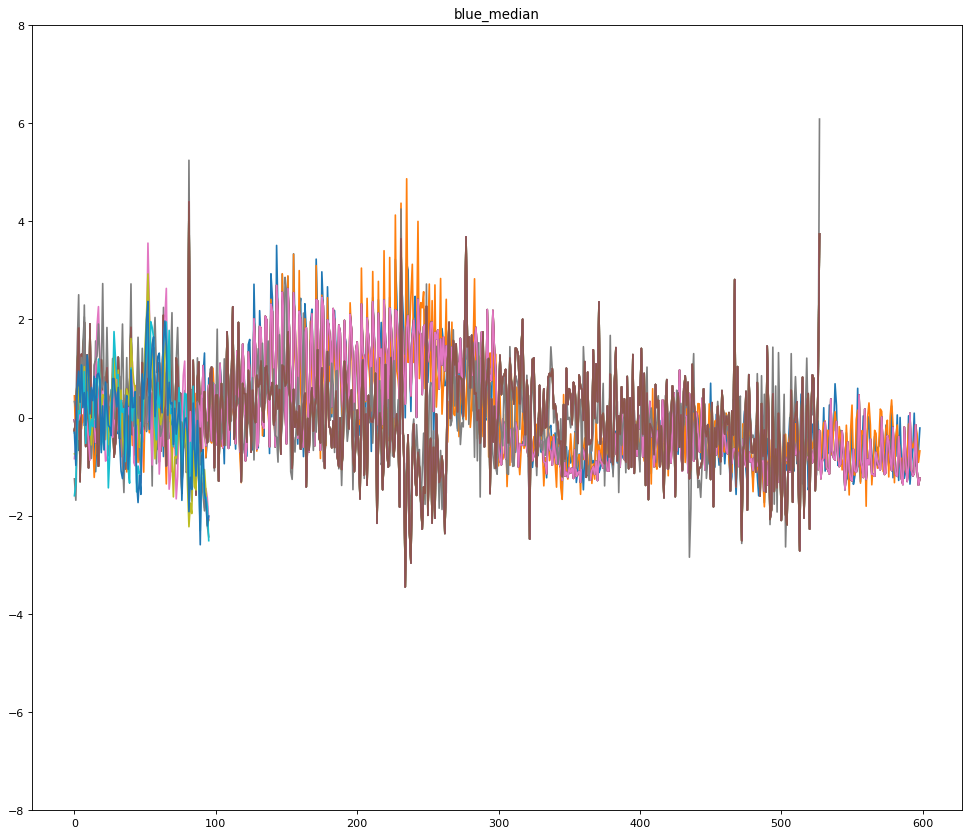

green_median


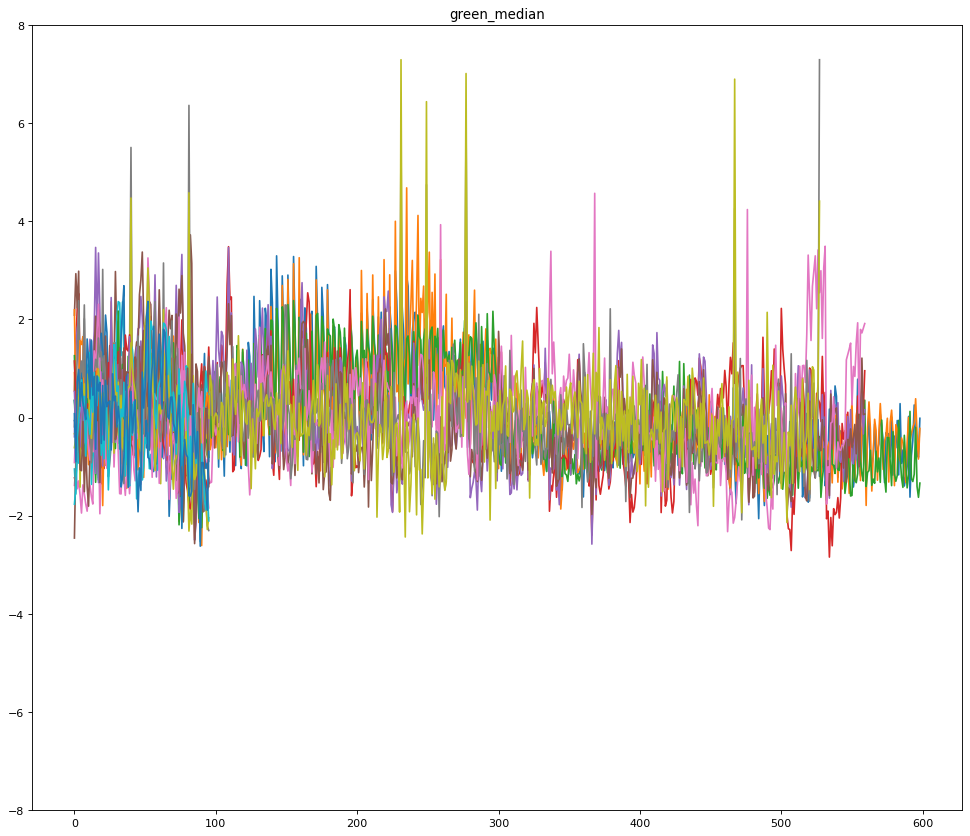

red_median


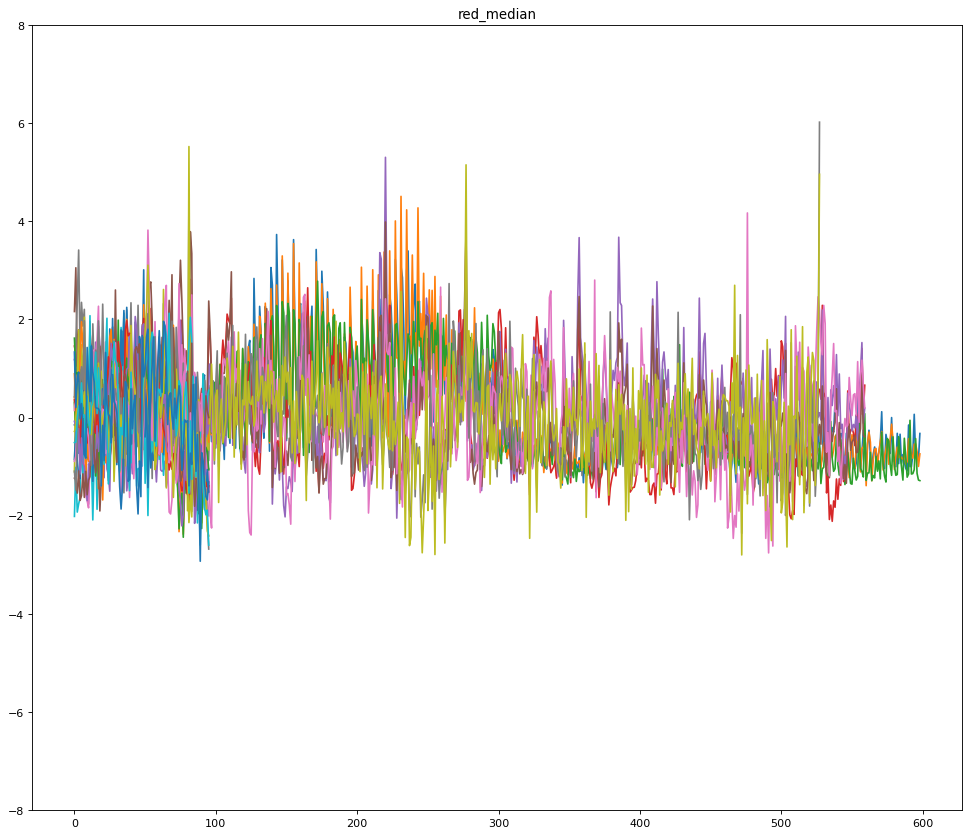

red_edge_median


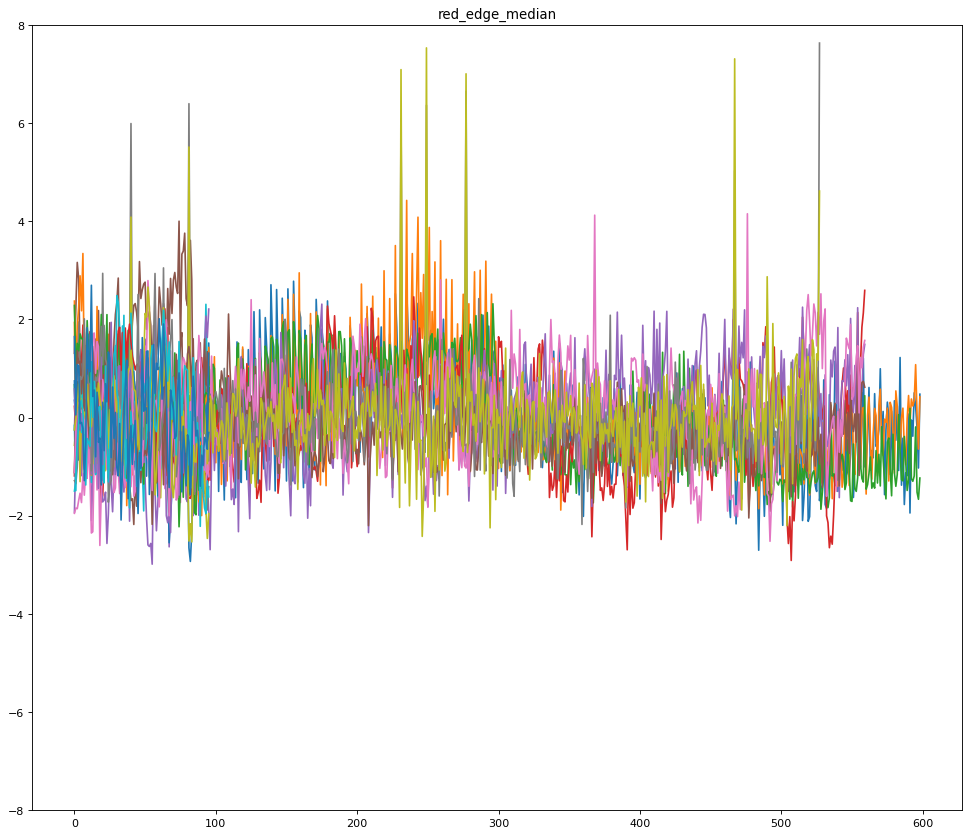

ndvi_median


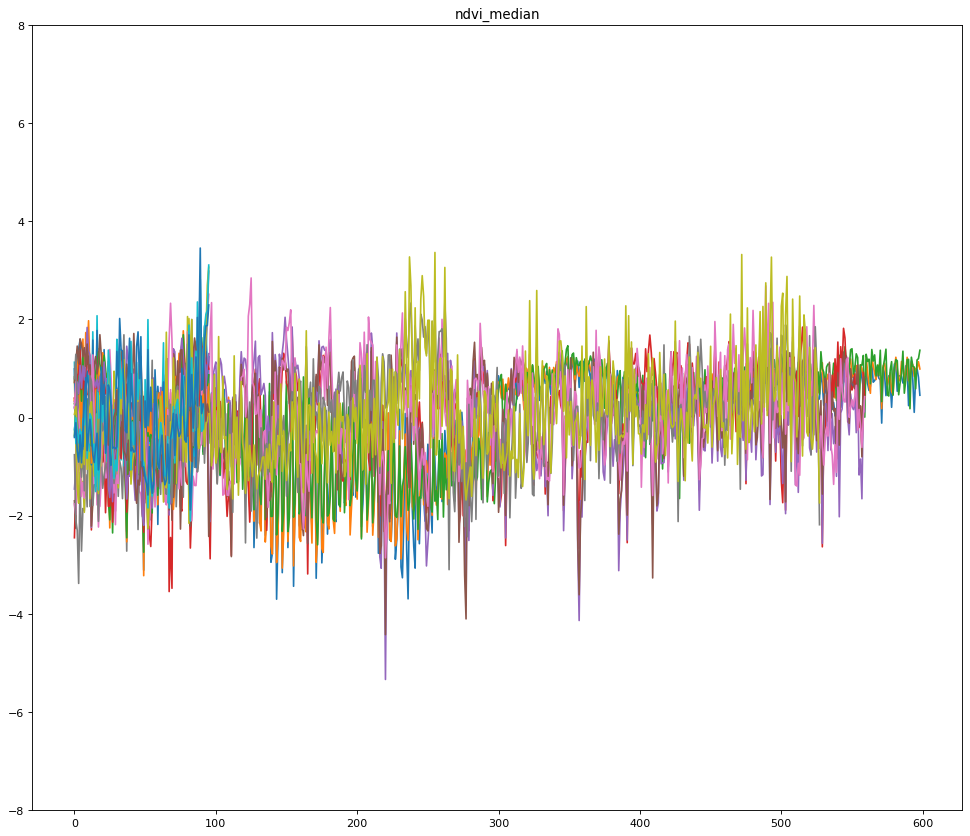

nir_median


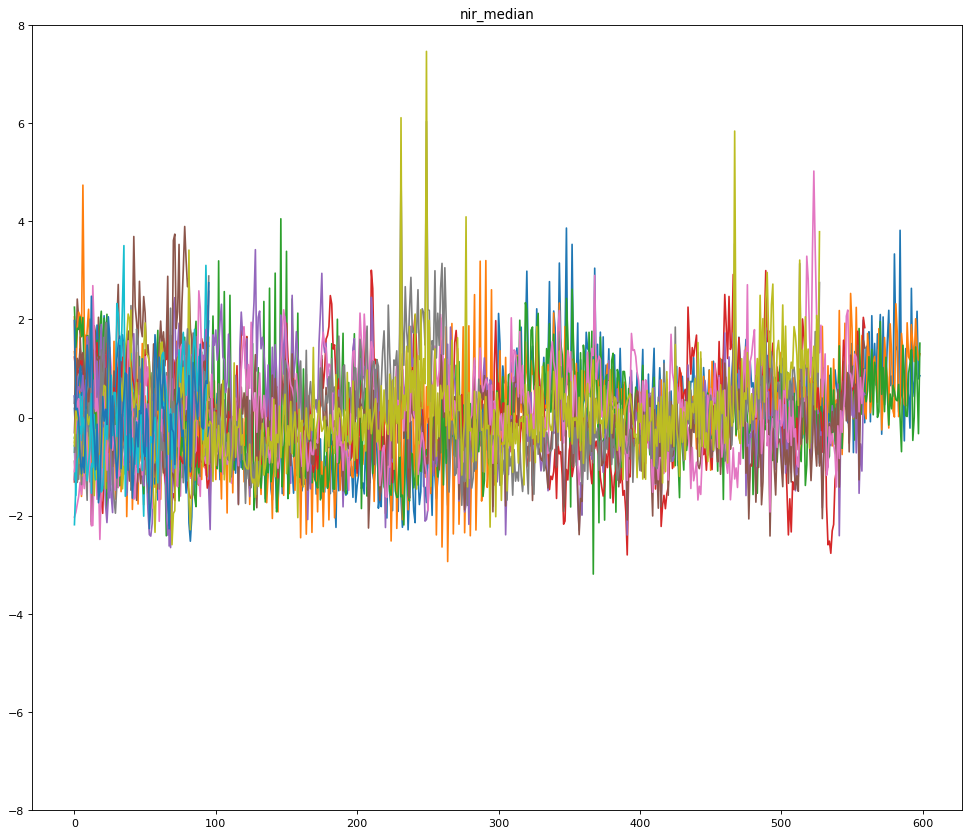

mtci_values


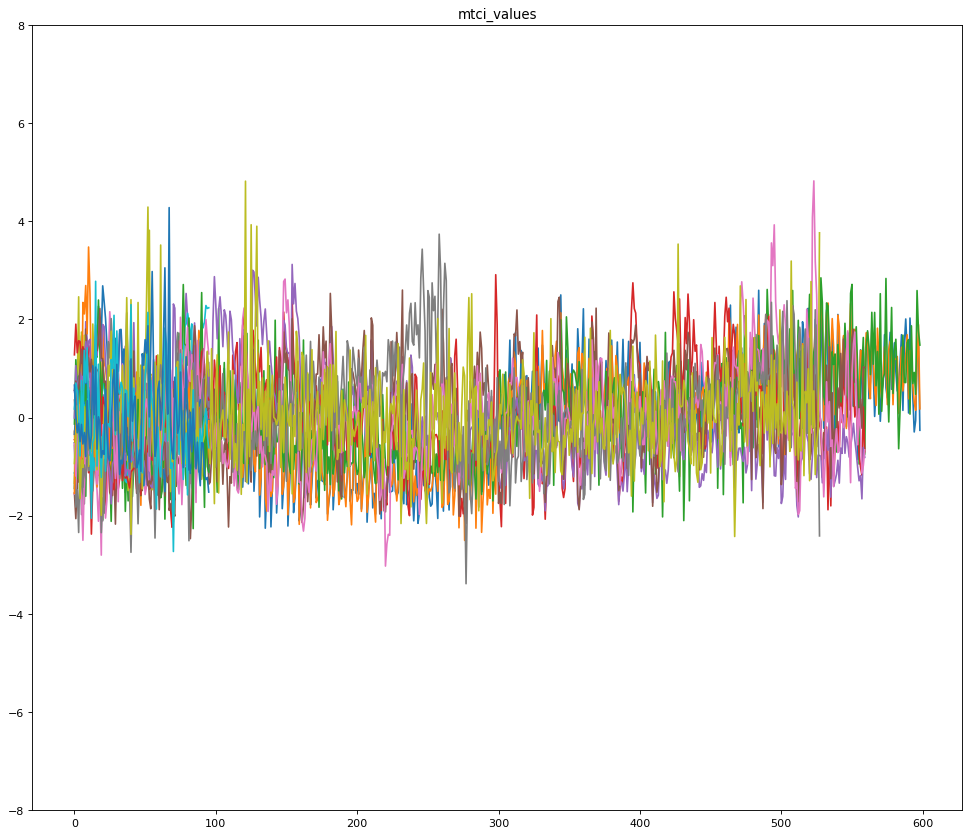

evi_values


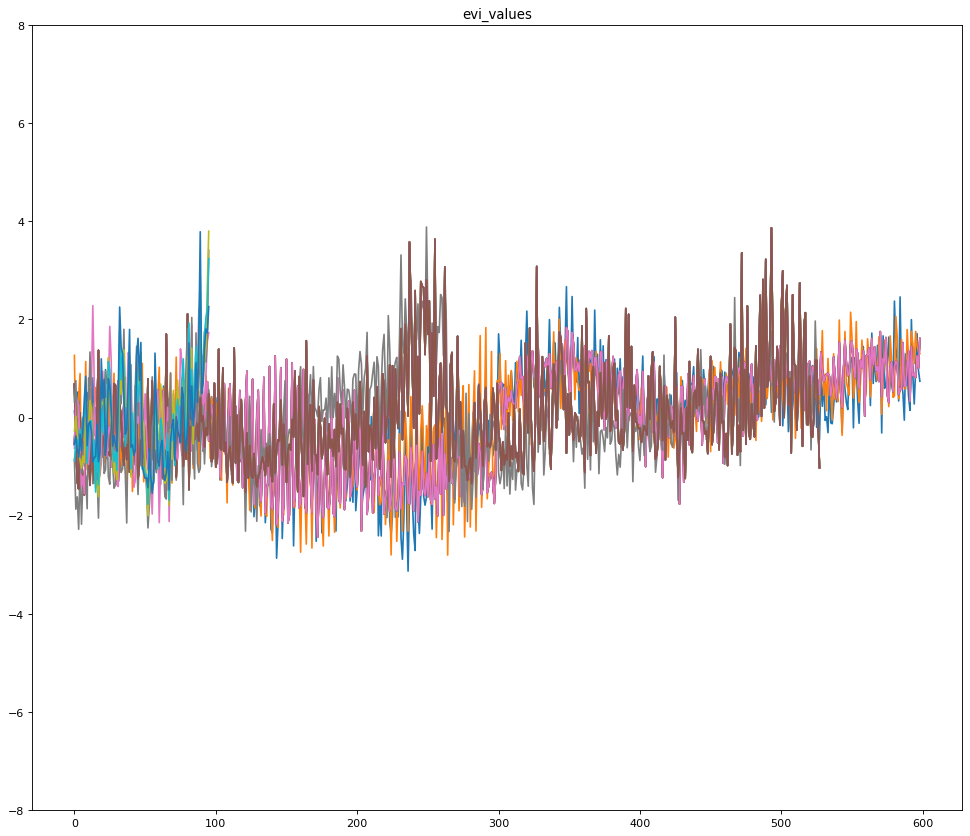

grain_yield


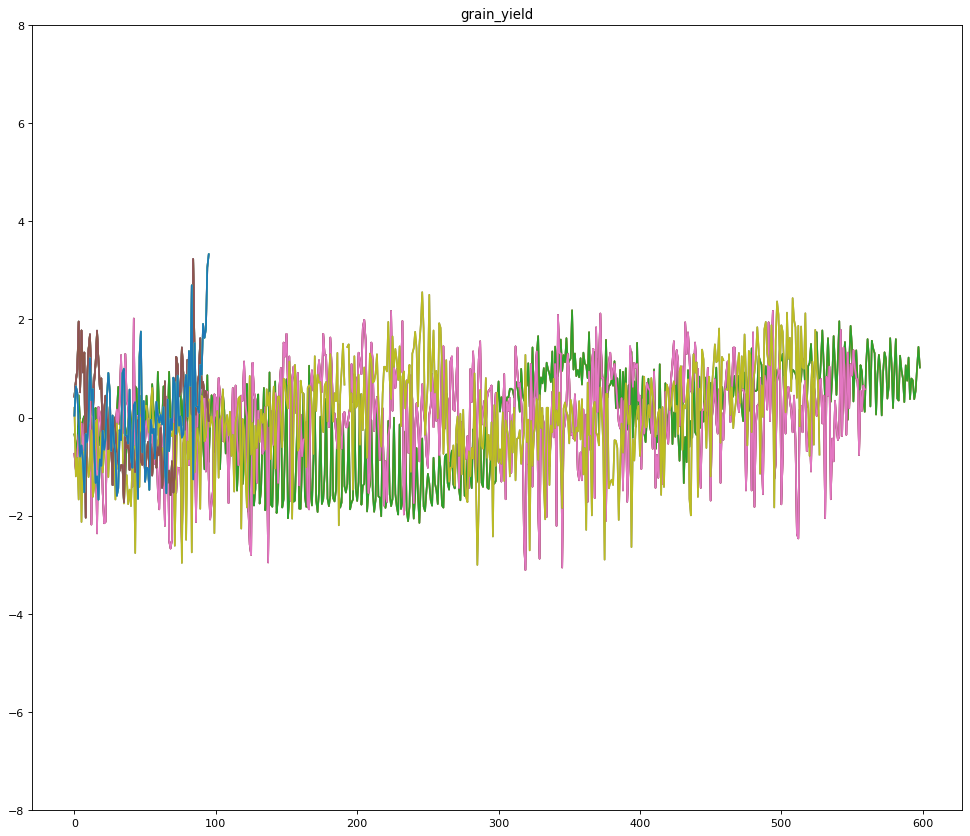

days_to_maturation


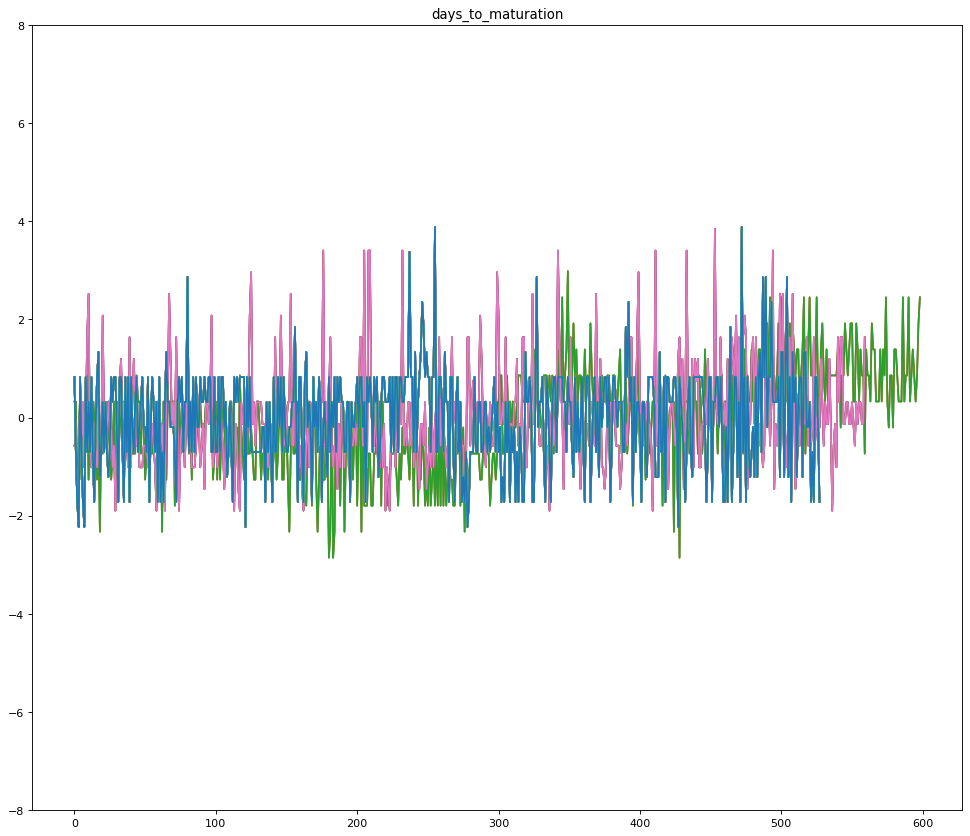

In [17]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sc = StandardScaler()
for parameter in list_std_col_names:
    print(parameter)
    plt.figure(figsize=(15,13), dpi=80, facecolor='w', edgecolor='k')
    plt.title(parameter)
    plt.ylim(-8,8)
    for i , j in enumerate(df_str_list_all):
        if parameter in (locals()[j].columns.tolist()): # CHECK IF THE PARAMETER IS PRESENT IN THE COLUMNS
            norm_df = sc.fit_transform(locals()[j][[parameter]])-
            df_norm = pd.DataFrame(norm_df)
        plt.plot(df_norm)
    plt.show()

    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    
    
#     org_df = locals()[j][locals()[lists_of_median_cols[i]]]
#     # Function to plot data frame directly from Pandas
#     org_df.plot(title=j)


In [21]:
list_select_cols = ['green_median','red_median','red_edge_median','ndvi_median','nir_median','mtci_values']

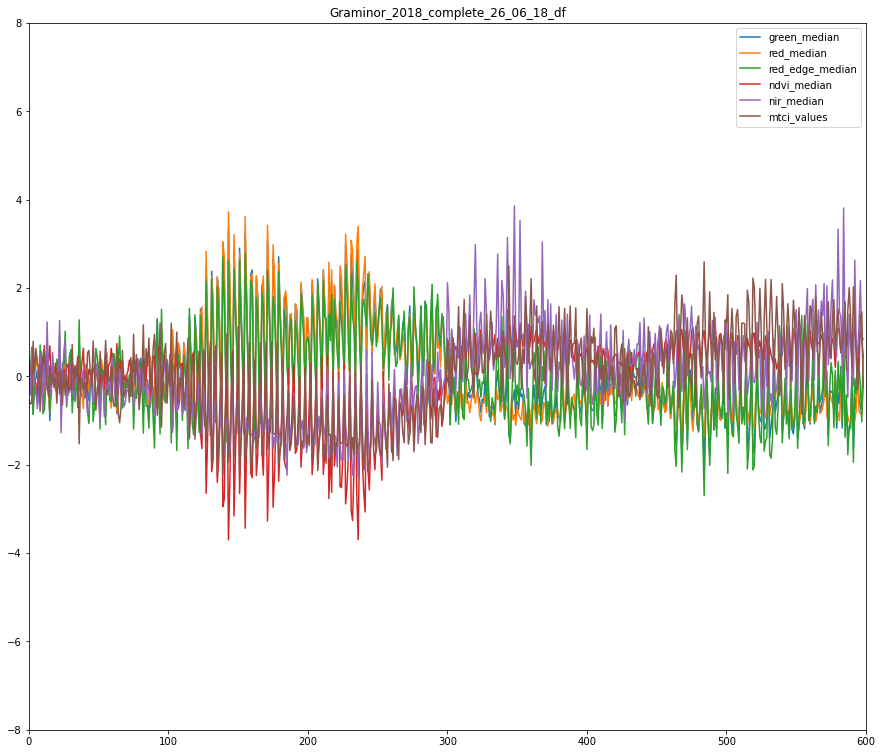

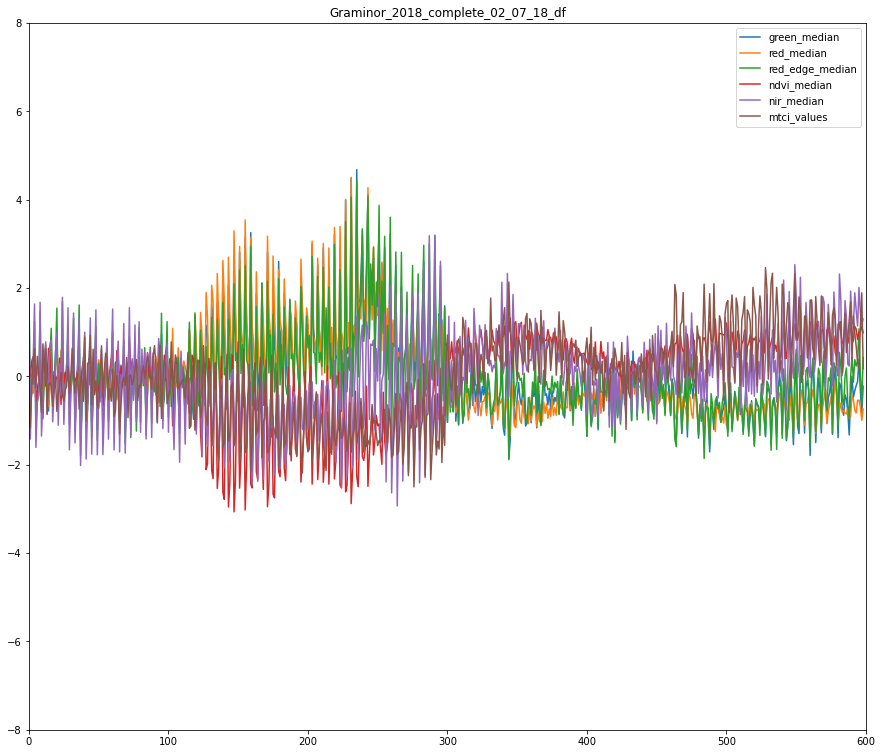

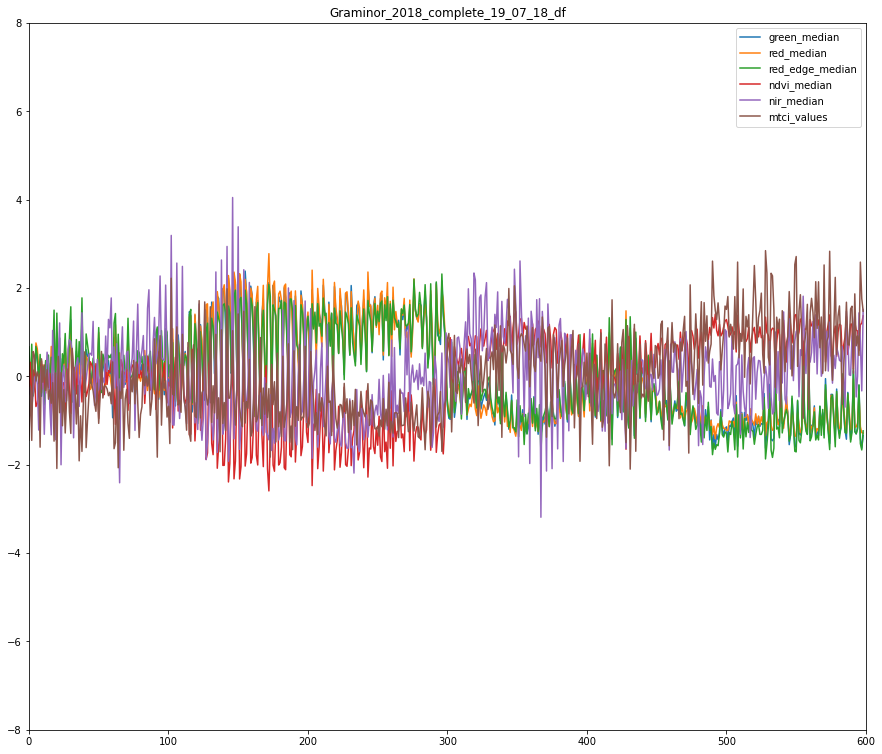

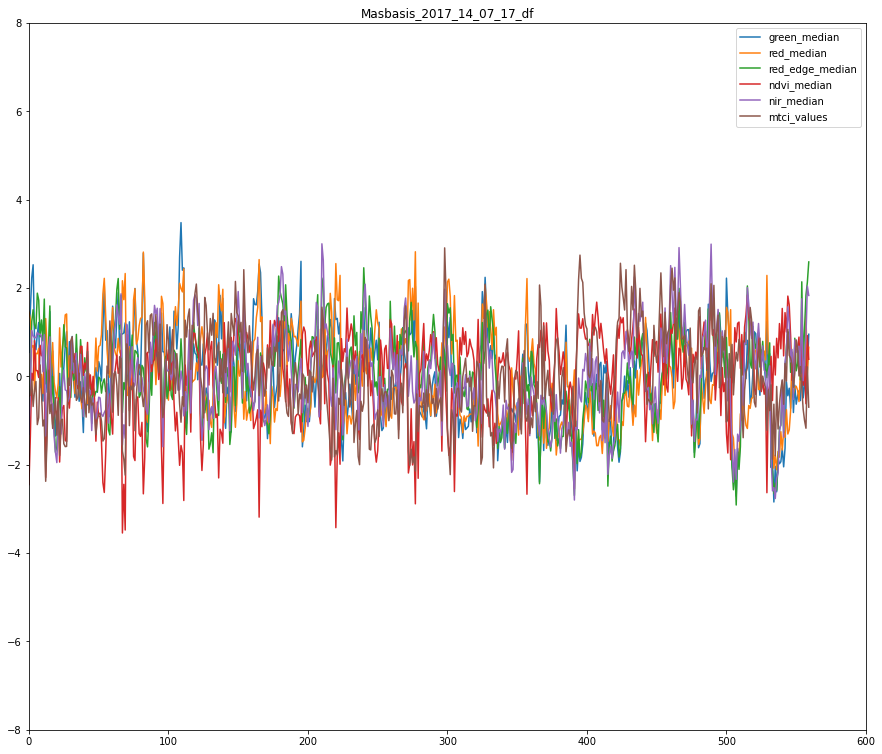

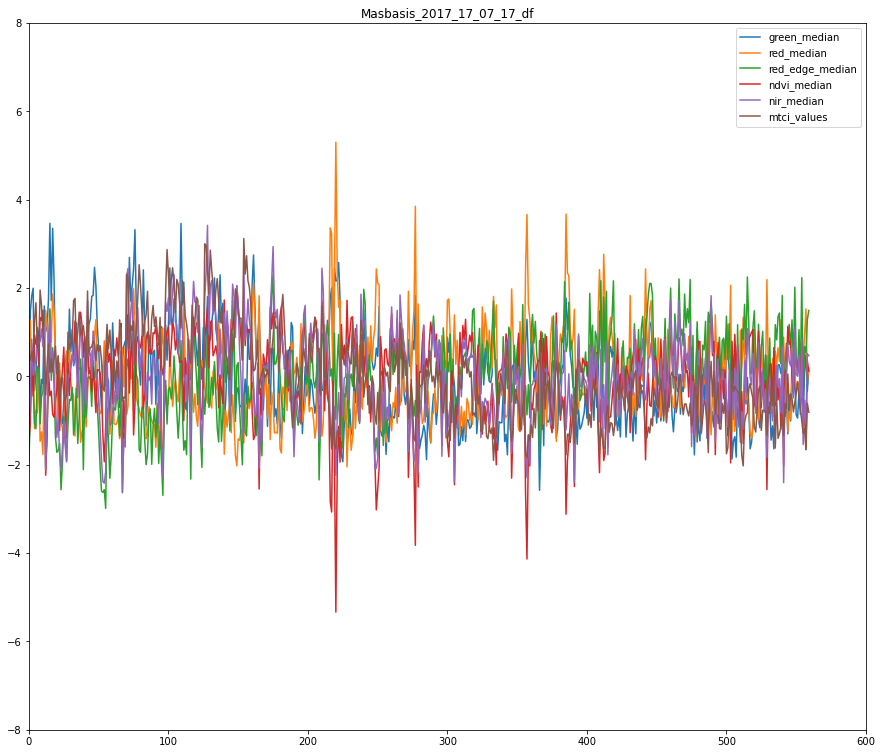

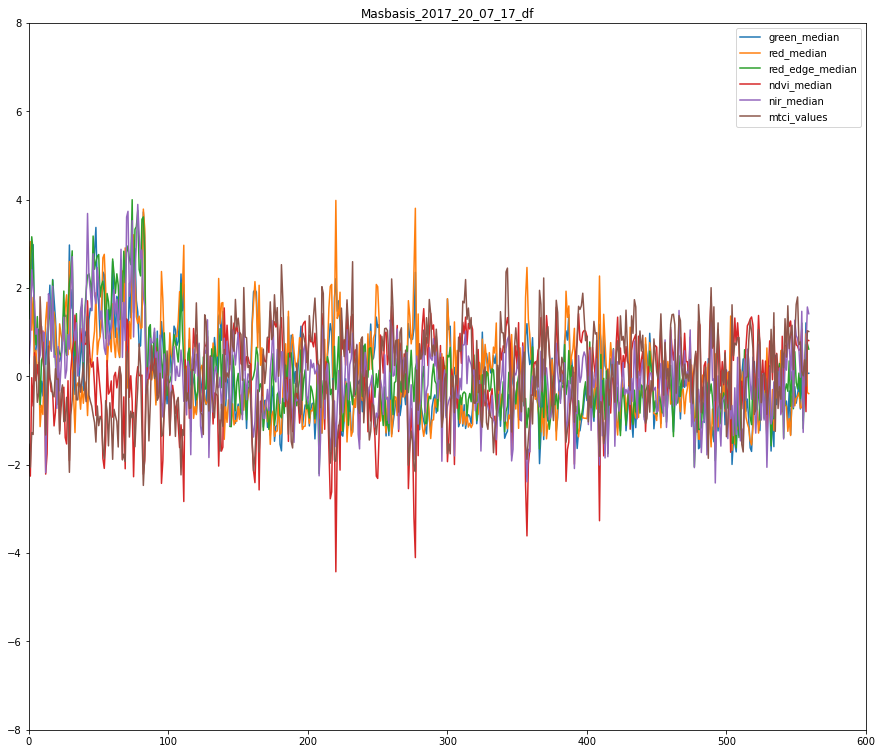

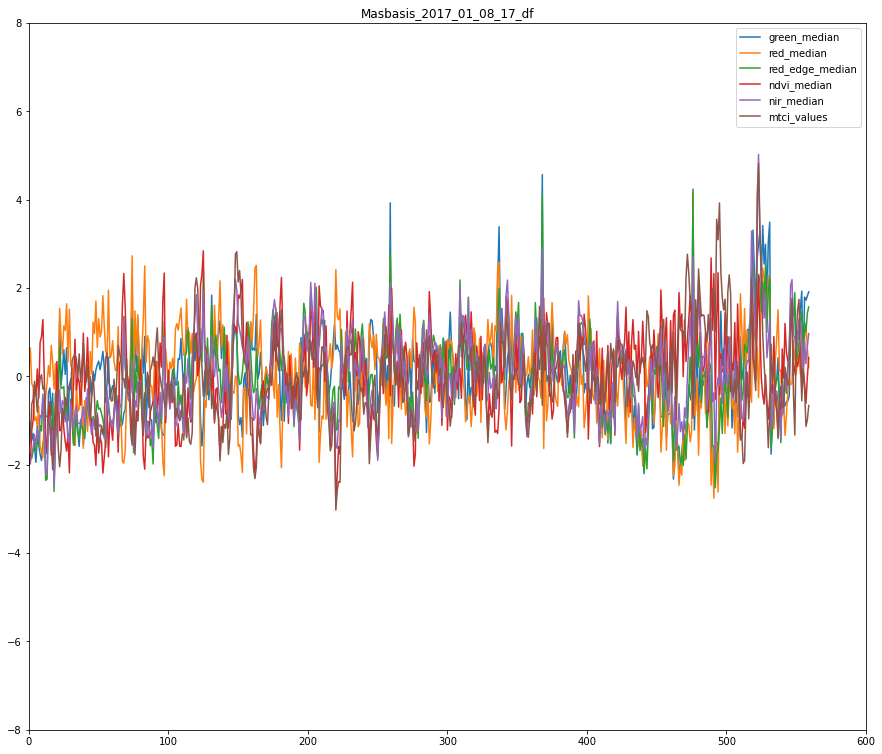

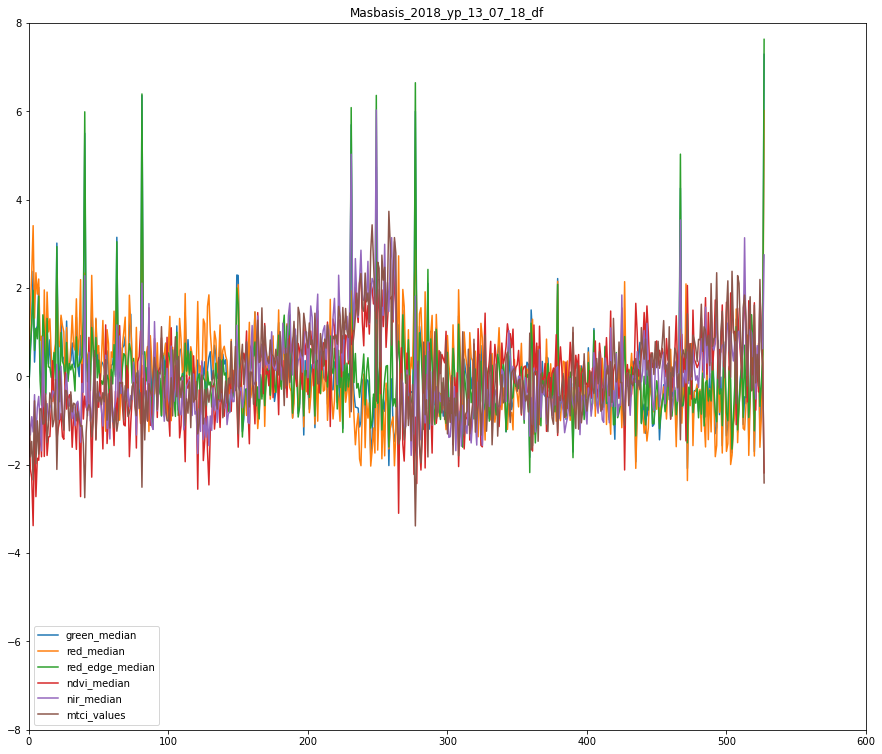

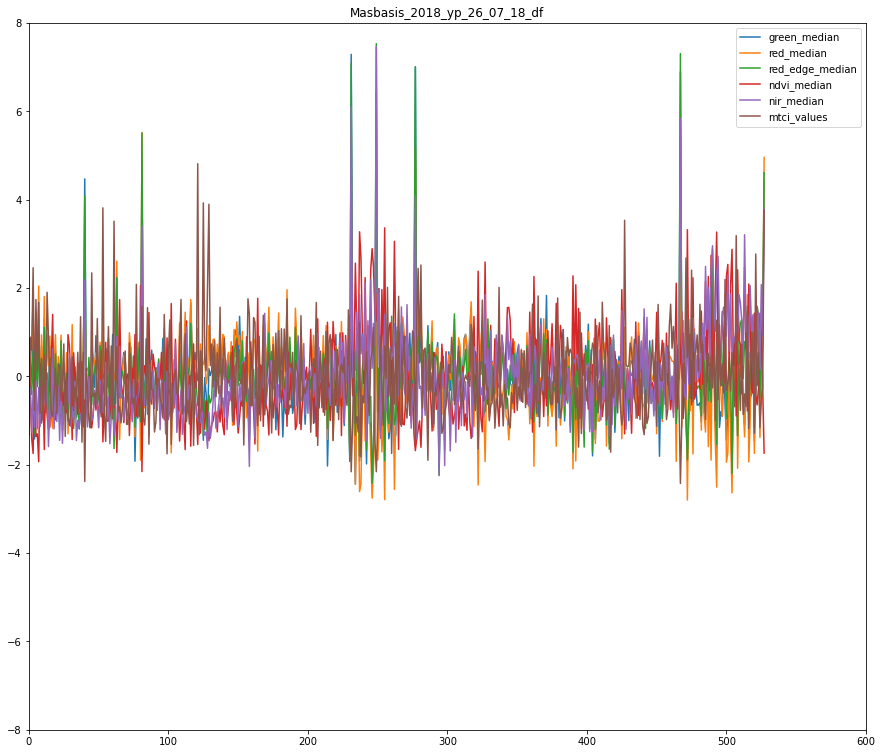

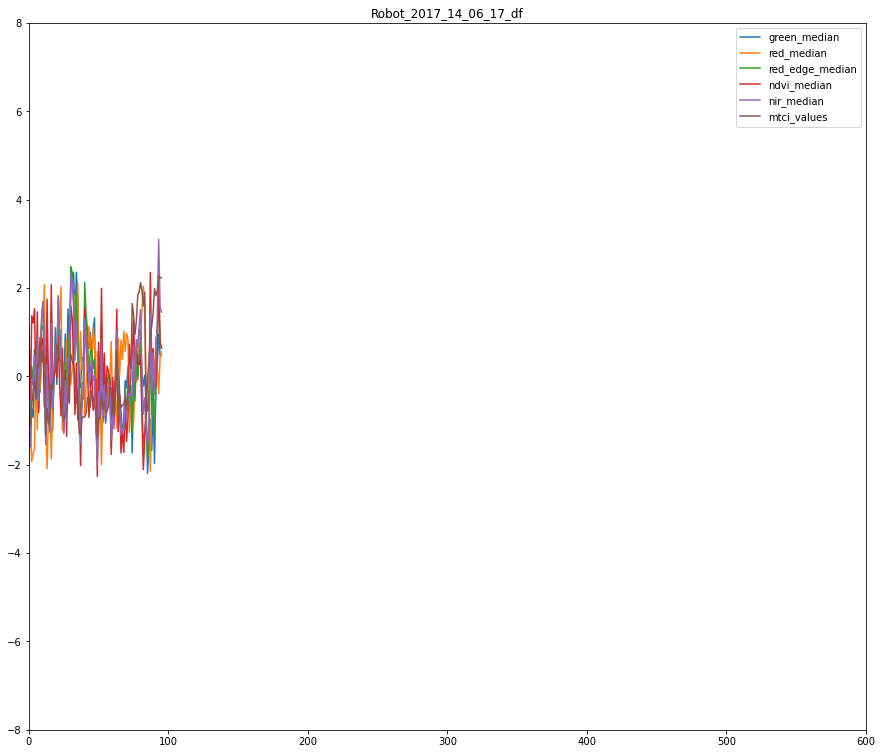

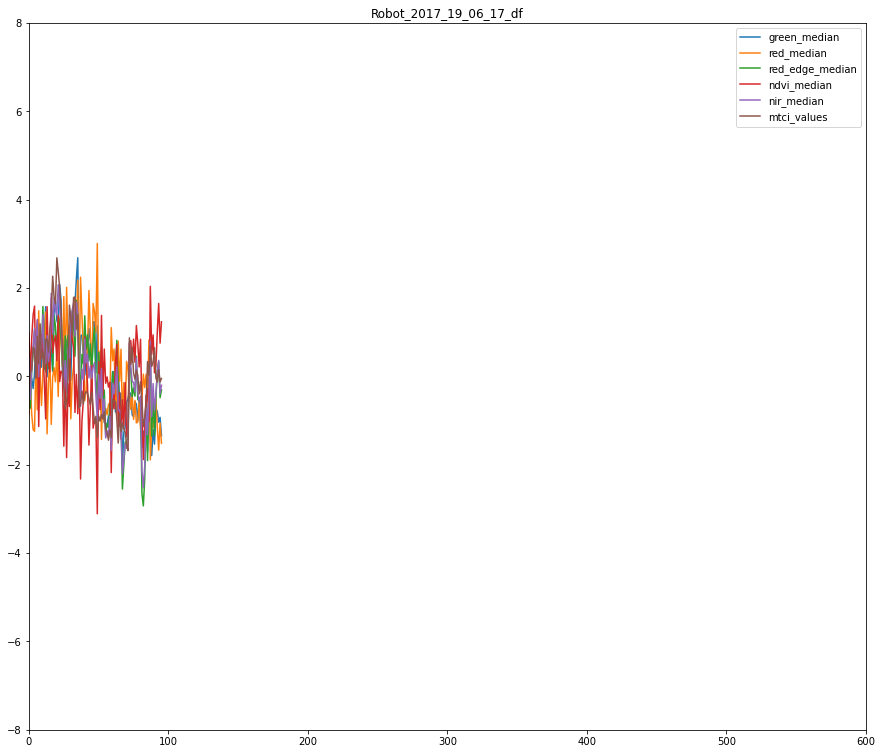

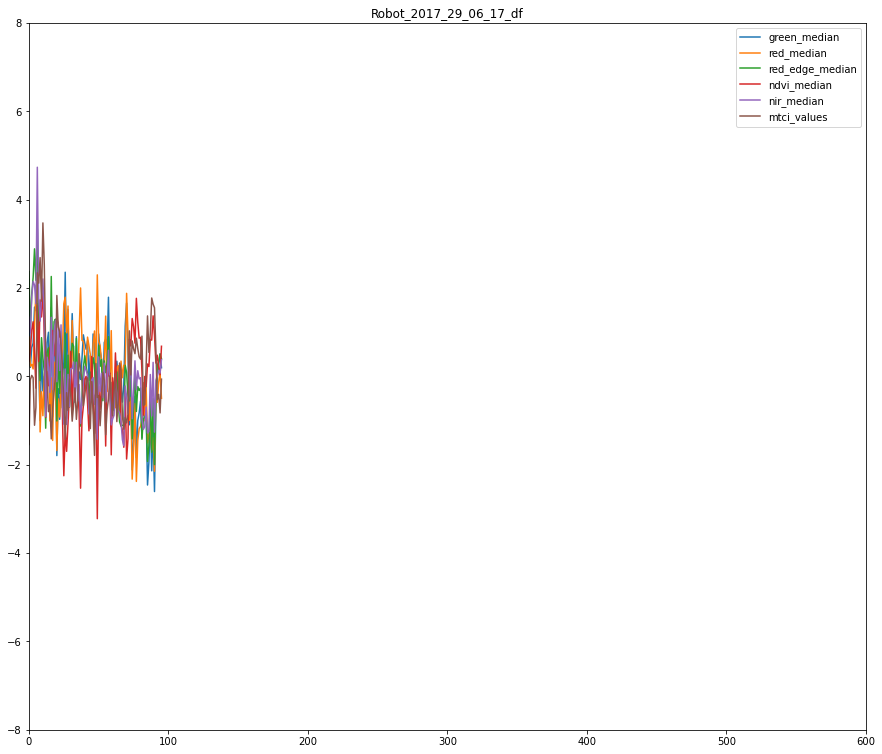

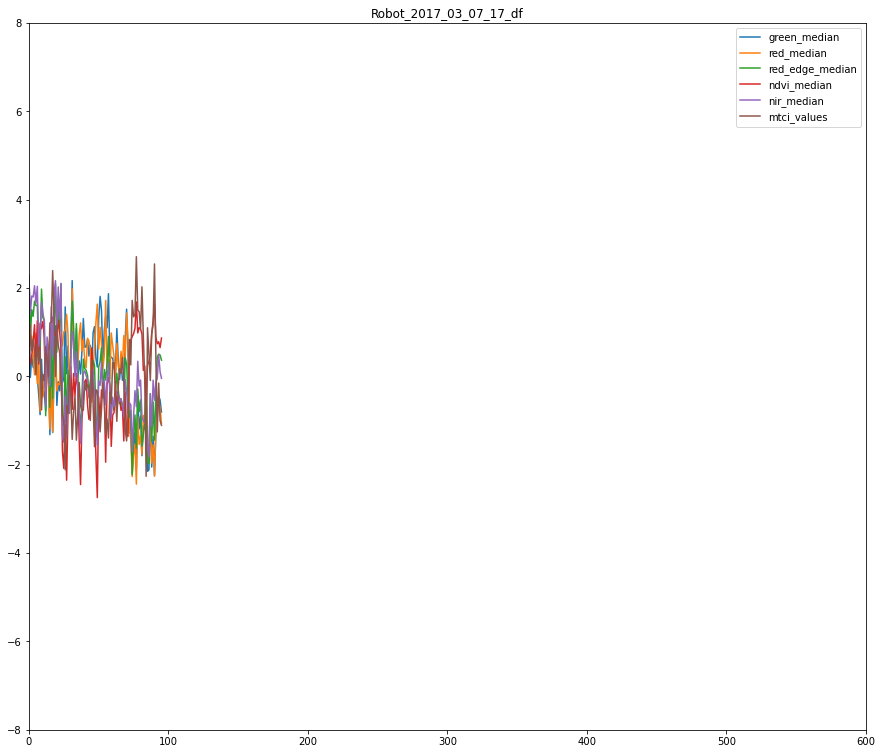

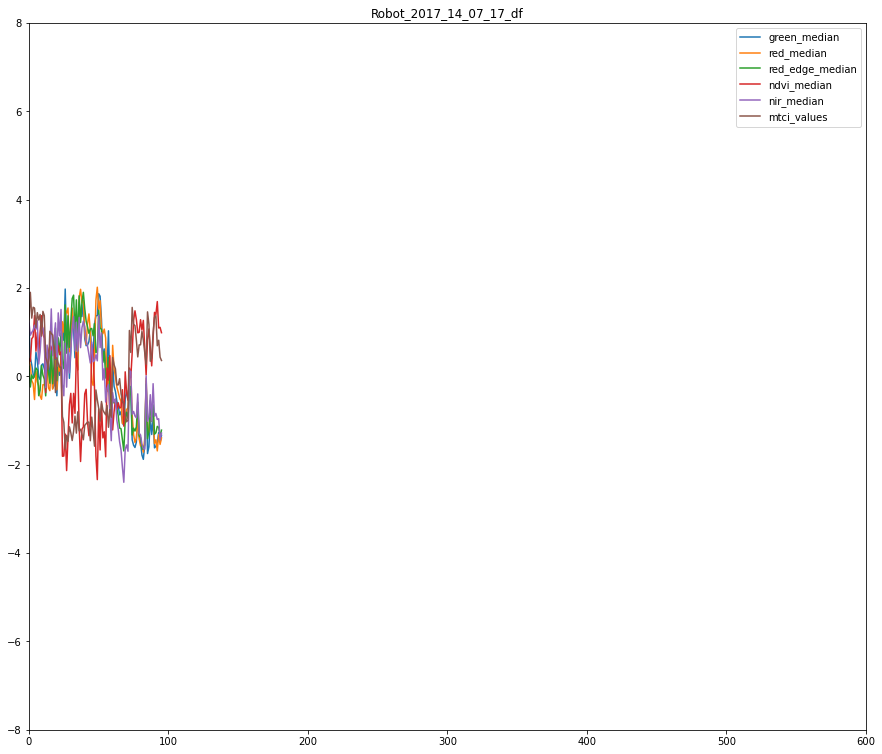

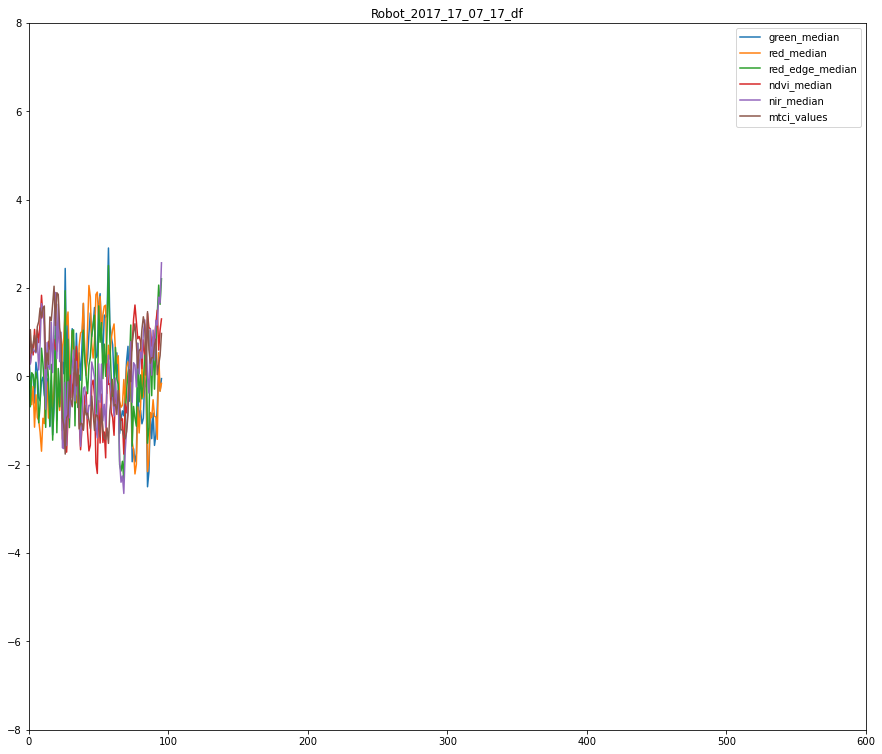

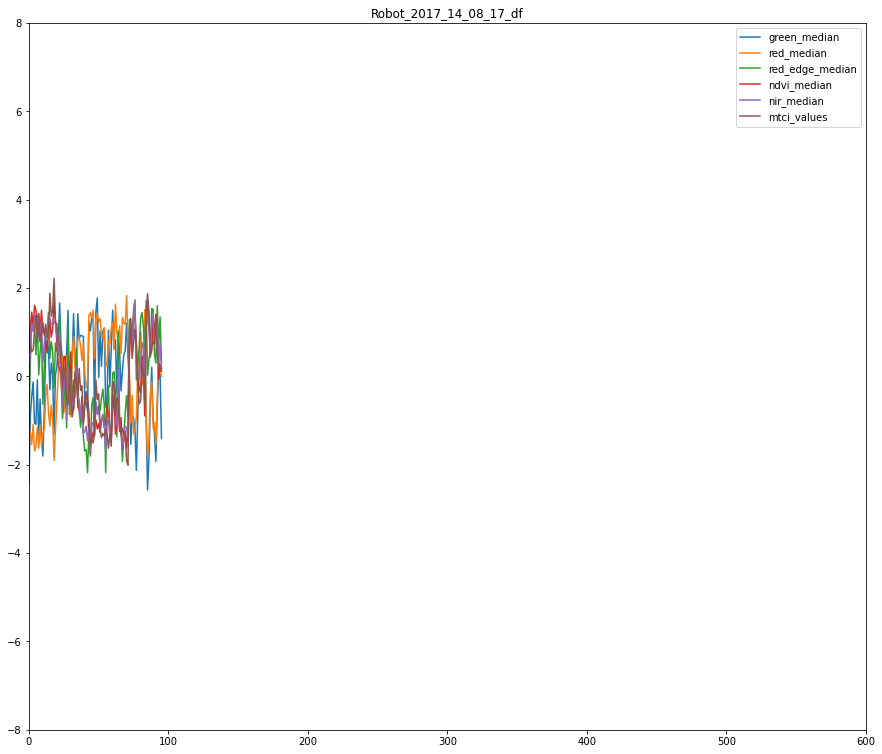

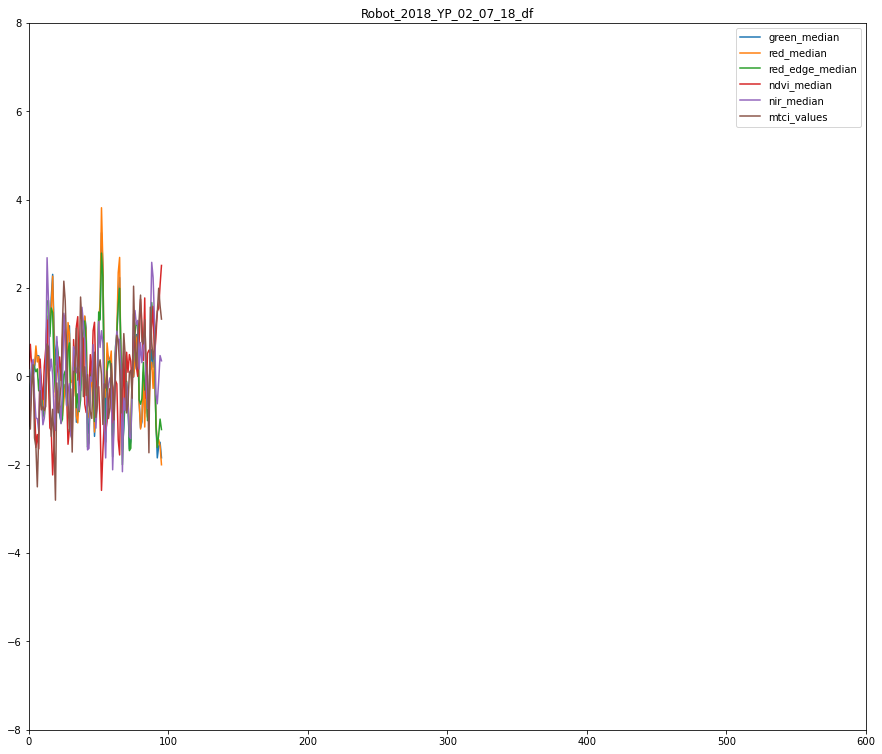

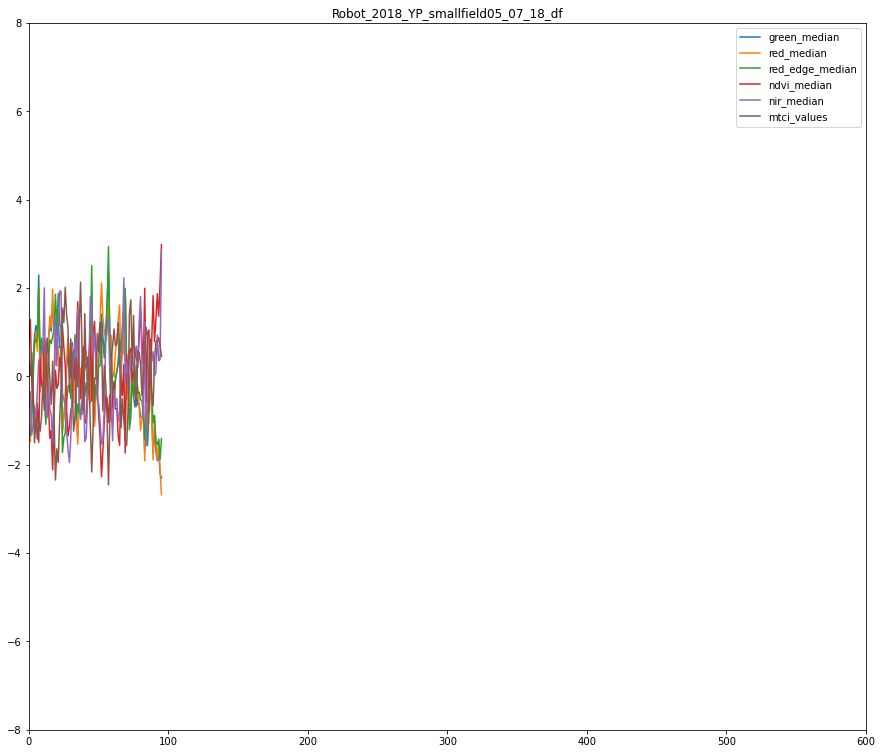

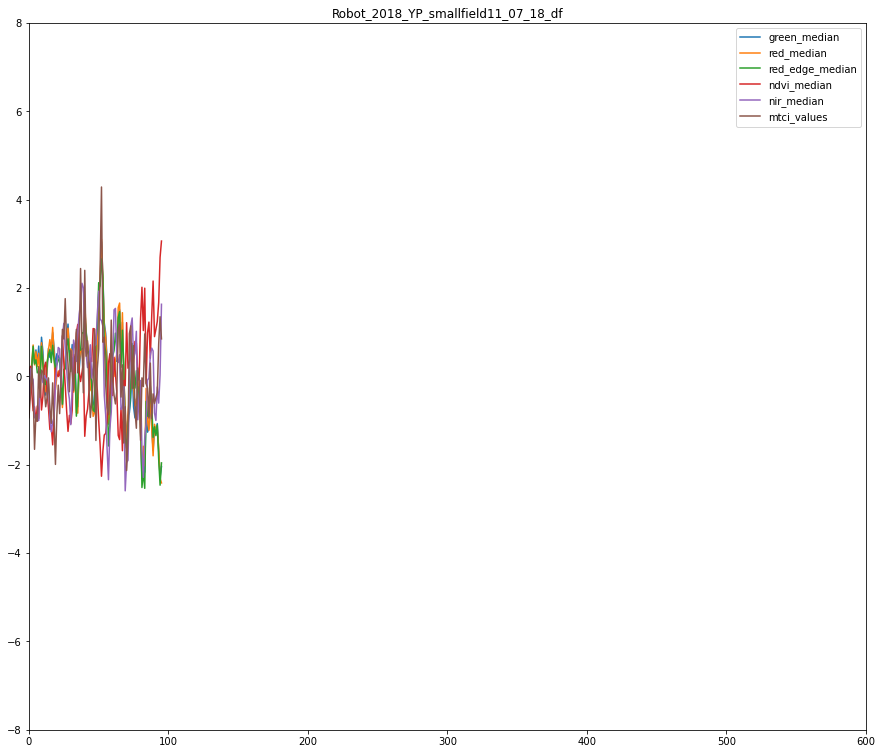

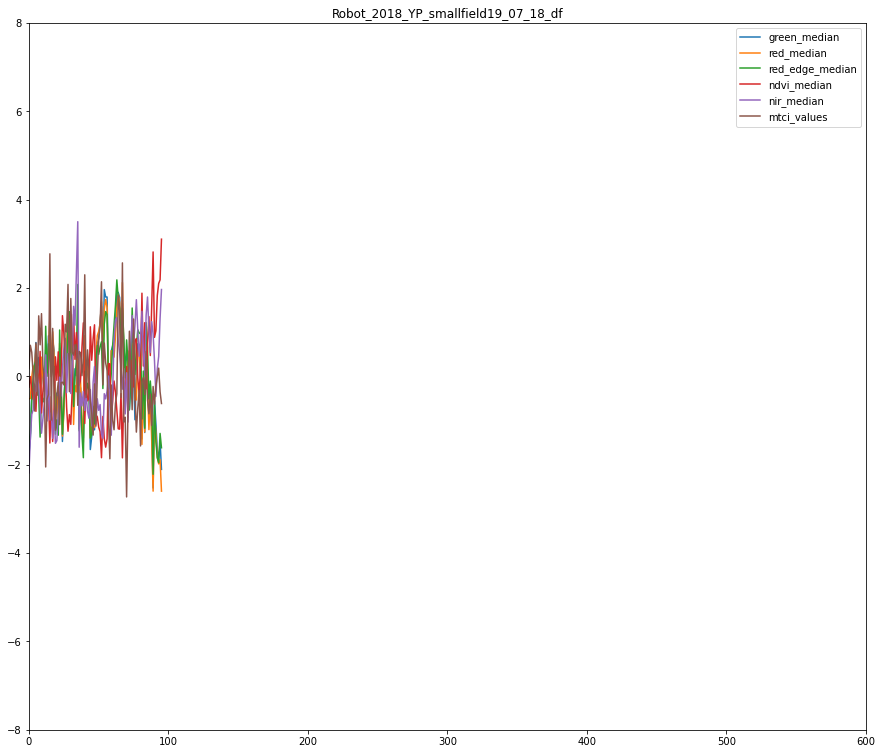

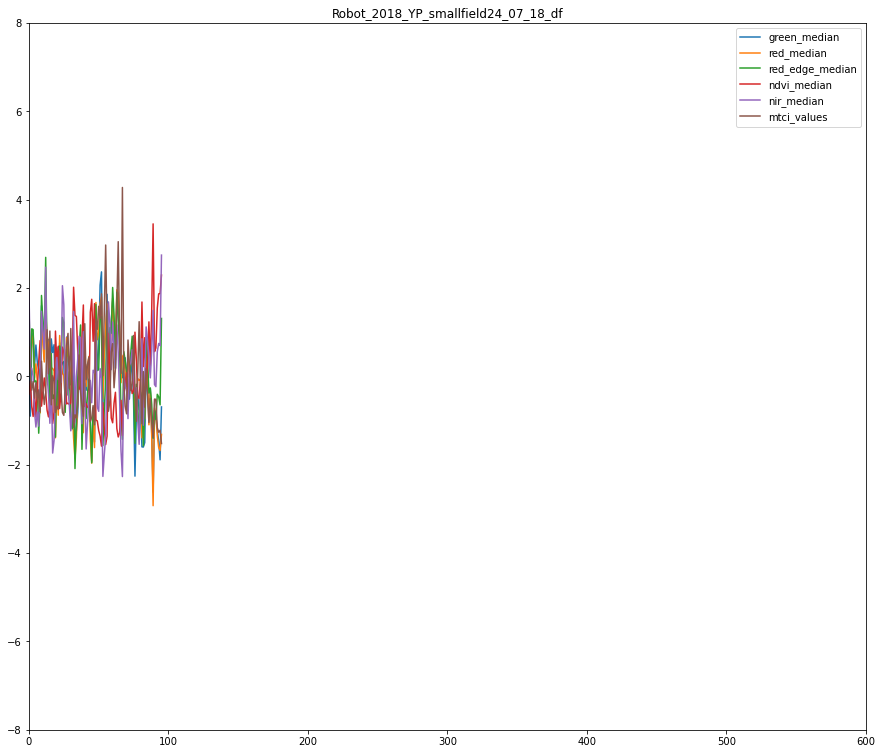

In [26]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sc = StandardScaler()

for i , j in enumerate(df_str_list_all):
    norm_df = sc.fit_transform(locals()[j][list_select_cols])
    df_norm = pd.DataFrame(norm_df)
    df_norm.columns = list_select_cols
    df_norm.plot(title=j, ylim=(-8,8), xlim=(0,600), figsize=(15,13))
    plt.show()
#     org_df = locals()[j][locals()[lists_of_median_cols[i]]]
#     # Function to plot data frame directly from Pandas
#     org_df.plot(title=j)


In [46]:
# Check if a specific part of text from variable column name is present in which dataset

text = 'evi'
blue_data = []
for i in lists_of_median_cols:
    if any(text in s for s in locals()[i]):
        blue_data.append(i)
blue_data

# remove _median_columns text from the end to get the df names

for i in range(len(blue_data)):
    blue_data[i] = blue_data[i][:-15]
blue_data

['Graminor_2018_complete_26_06_18_df',
 'Graminor_2018_complete_02_07_18_df',
 'Graminor_2018_complete_19_07_18_df',
 'Masbasis_2018_yp_13_07_18_df',
 'Masbasis_2018_yp_26_07_18_df',
 'Robot_2018_YP_02_07_18_df',
 'Robot_2018_YP_smallfield05_07_18_df',
 'Robot_2018_YP_smallfield11_07_18_df',
 'Robot_2018_YP_smallfield19_07_18_df',
 'Robot_2018_YP_smallfield24_07_18_df']

In [28]:
# # Check if a specific part of text from variable column name is present in which dataset

# text = 'redm'
# red_data = []
# for i in blue_data:
#     if any(text in s for s in locals()[i]):
#         red_data.append(i)
# red_data

In [29]:
# # Check if a specific part of text from variable column name is present in which dataset

# text = 'rede'
# red_edge_data = []
# for i in blue_data:
#     if any(text in s for s in locals()[i]):
#         red_edge_data.append(i)
# red_edge_data

In [30]:
# # Check if a specific part of text from variable column name is present in which dataset

# text = 'green'
# green_data = []
# for i in blue_data:
#     if any(text in s for s in locals()[i]):
#         green_data.append(i)
# green_data

In [31]:
# # Check if a specific part of text from variable column name is present in which dataset

# text = 'ndvi'
# ndvi_data = []
# for i in blue_data:
#     if any(text in s for s in locals()[i]):
#         ndvi_data.append(i)
# ndvi_data

In [32]:
# # Check if a specific part of text from variable column name is present in which dataset

# text = 'nir'
# nir_data = []
# for i in blue_data:
#     if any(text in s for s in locals()[i]):
#         nir_data.append(i)
# nir_data

In [33]:
# # Check if a specific part of text from variable column name is present in which dataset

# text = 'mtci'
# mtci_data = []
# for i in blue_data:
#     if any(text in s for s in locals()[i]):
#         mtci_data.append(i)
# mtci_data

In [34]:
# # Check if a specific part of text from variable column name is present in which dataset

# text = 'evi'
# evi_data = []
# for i in blue_data:
#     if any(text in s for s in locals()[i]):
#         evi_data.append(i)
# evi_data

In [35]:
# from IPython.display import display, HTML

# for i in evi_data:
#     display(locals()[i])

In [47]:
final_columns = ['blue_median','green_median','red_median','red_edge_median','ndvi_median','nir_median','mtci_values', 'evi_values','grain_yield']

In [51]:
blue_data

['Graminor_2018_complete_26_06_18_df',
 'Graminor_2018_complete_02_07_18_df',
 'Graminor_2018_complete_19_07_18_df',
 'Masbasis_2018_yp_13_07_18_df',
 'Masbasis_2018_yp_26_07_18_df',
 'Robot_2018_YP_02_07_18_df',
 'Robot_2018_YP_smallfield05_07_18_df',
 'Robot_2018_YP_smallfield11_07_18_df',
 'Robot_2018_YP_smallfield19_07_18_df',
 'Robot_2018_YP_smallfield24_07_18_df']

In [49]:
data_frames = [locals()[blue_data[0]][final_columns],
               locals()[blue_data[1]][final_columns],
               locals()[blue_data[2]][final_columns],
               locals()[blue_data[3]][final_columns],
               locals()[blue_data[4]][final_columns]]

all_robot_2018 = pd.concat(data_frames, ignore_index=True)

In [68]:
all_robot_2018

blue_median  green_median  red_median  red_edge_median  ndvi_median  \
0        0.034152      0.085196    0.045748         0.174878     0.883373   
1        0.036060      0.084995    0.045884         0.168578     0.876906   
2        0.036943      0.089985    0.045336         0.180775     0.888153   
3        0.030649      0.072090    0.036053         0.151221     0.906785   
4        0.037586      0.085404    0.050601         0.167592     0.869756   
...           ...           ...         ...              ...          ...   
2848     0.068131      0.163622    0.217150         0.325768     0.494808   
2849     0.046474      0.126268    0.135773         0.271112     0.614081   
2850     0.055161      0.149461    0.179854         0.323306     0.581474   
2851     0.066842      0.159273    0.206122         0.319578     0.494443   
2852     0.096382      0.226629    0.338509         0.421411     0.390217   

      nir_median  mtci_values  evi_values  grain_yield  
0       0.734195     4.331436    0.982070   431.698672  
1       0.692295     4.268514    0.952200   409.089032  
2       0.759447     4.272559    1.017603   372.860721  
3       0.739433     5.107437    1.018870   528.219355  
4       0.713398     4.665330    0.954982   462.505958  
...          ...          ...         ...          ...  
2848    0.646374     2.951702    0.440086   401.333333  
2849    0.572141     2.224253    0.535231   633.333333  
2850    0.682188     2.501767    0.534943   557.333333  
2851    0.616157     2.614036    0.435916   524.000000  
2852    0.779900     4.324239    0.357334   381.333333  

[2853 rows x 9 columns]

In [76]:
#Count Nan values in any cell in all columns

counter=0
for d in final_columns:
    for x in all_robot_2018[d]:
        if not pd.notna(x):
            print(d)
            counter+=1
print(counter)

grain_yield
grain_yield
grain_yield
grain_yield
4


Looks like there are 4 grain yield missing values

In [77]:
# Drop rows having Nan values
all_robot_2018.dropna(axis=0, inplace=True)

In [78]:
# # Grain yield already appended to the list and dataframe

# lists_of_yield_cols = []

# for df in df_str_list_all:
#     list_of_columns = df+'_yield_columns'
#     locals()[list_of_columns] = []
#     for strg in locals()[df].columns.tolist():
#         if strg.find('Yield') != -1 or strg.find('yield') != -1 or strg.find('yie') != -1 or strg.find('YIE') != -1 :
#             locals()[list_of_columns].append(strg)
#     lists_of_yield_cols.append(list_of_columns)
    
#     print('\n', list_of_columns,locals() [df].shape, *locals()[list_of_columns], sep='\n')

# lists_of_yield_cols

# Outliers Removal

USE scipy.stats.zscore() TO REMOVE OUTLIERS FROM A DATAFRAME
Call scipy.stats.zscore(a) with a as a DataFrame to get a NumPy array containing the z-score of each value in a. Call numpy.abs(x) with x as the previous result to convert each element in x to its absolute value. Use the syntax (array < 3).all(axis=1) with array as the previous result to create a boolean array. Filter the original DataFrame with this result.

Note that a value is removed if it is an outlier in its column, not necessarily the entire DataFrame.

In [ ]:
z_scores = stats.zscore(df)
calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

print(new_df)

## Machine Learning Part

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalization

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
#==============================================================================
# Split dataframe into data and target
#==============================================================================

X = all_robot_2018.iloc[:,:-1].values
y = all_robot_2018.iloc[:,-1:].values

In [81]:
X

array([[0.03415194, 0.08519619, 0.04574775, ..., 0.73419499, 4.33143627,
        0.98206956],
       [0.03605997, 0.08499502, 0.04588434, ..., 0.69229525, 4.26851424,
        0.95219974],
       [0.0369426 , 0.08998522, 0.0453362 , ..., 0.75944716, 4.27255893,
        1.01760297],
       ...,
       [0.05516053, 0.14946119, 0.17985395, ..., 0.68218839, 2.50176734,
        0.53494283],
       [0.06684192, 0.15927336, 0.20612174, ..., 0.61615691, 2.61403629,
        0.43591584],
       [0.09638207, 0.22662921, 0.33850875, ..., 0.77989972, 4.32423937,
        0.35733368]])

In [82]:
#==============================================================================
# Create separate train/test splits from Main data
#==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=55)

In [83]:
#==============================================================================
# Scale features using StandardScaler class in scikit-learn
#==============================================================================

# Initialise standard scaler and compute mean and STD from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [84]:
#==============================================================================
# Defining the function to vaiidate the model with the test data and
# get the results from regression evaluation metrices in sklearn
#==============================================================================
pred = []
accuracy = []


def test_data_regression(model, X_test, y_test):
    pred = []
    accuracy = []
    #==============================================================================
    # Make predictions for test set
    #==============================================================================

    # Predict classes for samples in test set
    y_pred = model.predict(X_test)

    #==============================================================================
    # Compute performance
    #==============================================================================

    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_test, y_pred)
    print(mae, ' mean_absolute_error')
    accuracy.append(mae)

    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred, squared=True)
    print(mse, ' mean_squared_error')
    accuracy.append(mse)

    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(rmse, ' root_mean_squared_error')
    accuracy.append(rmse)

    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(r2, ' r2_score')
    accuracy.append(r2)

    # Print accuracy computed from predictions on the test set
    print(accuracy)

    #==============================================================================
    # Append Results
    #==============================================================================
    results = []
    import datetime
    datetime = datetime.datetime.now()
    results.append((model, 'MAE = {}'.format(mae), 'MSE = {}'.format(mse),
                    'RMSE = {}'.format(rmse), 'R2 = {}'.format(r2),
                    'List = {}'.format(accuracy), datetime))

    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)
    pred.extend(y_pred)

In [85]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000,
                              max_depth=250,
                              min_samples_split=5,
                              random_state=0,
                              n_jobs=-1)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
test_data_regression(model, X_test_std, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


57.707600186159155  mean_absolute_error
5640.7433576513195  mean_squared_error
75.10488238224809  root_mean_squared_error
0.5690653167689081  r2_score
[57.707600186159155, 5640.7433576513195, 75.10488238224809, 0.5690653167689081]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [86]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10,
                              max_depth=1,
                              min_samples_split=10,
                              random_state=0,
                              n_jobs=-1)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
test_data_regression(model, X_test_std, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


82.79076418225138  mean_absolute_error
10134.835737443285  mean_squared_error
100.67192129607582  root_mean_squared_error
0.22573108698694933  r2_score
[82.79076418225138, 10134.835737443285, 100.67192129607582, 0.22573108698694933]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [87]:
from sklearn.cross_decomposition import PLSRegression

model = PLSRegression(n_components=5)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
test_data_regression(model, X_test_std, y_test)

68.37558091956643  mean_absolute_error
7466.0508443167  mean_squared_error
86.40631252586063  root_mean_squared_error
0.429617684836048  r2_score
[68.37558091956643, 7466.0508443167, 86.40631252586063, 0.429617684836048]


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


# Define the pipeline
pipe_line = make_pipeline(RandomForestRegressor())

# Define ranges of parameter values:
param_range  = list(range(1,200))                   # For n_components
param_range2 = list(range(1, 20, 1))          # For max_iter
param_range3 = list(range(1, 15,1))                   # For max_depth
param_range4 = [x/10 for x in list(range(0, 10))]   # For learning_rate
param_range5  = list(range(5,20))                   # For n_components


# estimator.get_params().keys()
# pipe_line.get_params().keys()

gs = GridSearchCV(estimator=pipe_line, 
                  param_grid=[{'randomforestregressor__n_estimators': param_range2,
                              'randomforestregressor__max_depth': param_range3,
                               'randomforestregressor__min_samples_split': param_range3}], 
                  scoring='neg_root_mean_squared_error', 
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)


# # Inspect AUC of parameter grid combinations
# for r, _ in enumerate(grid.cv_results_['mean_test_score']):
#     print("%0.3f +/- %0.2f %r"
#           % (grid.cv_results_['mean_test_score'][r], 
#              grid.cv_results_['std_test_score'][r] / 2.0, 
#              grid.cv_results_['params'][r]))

-114.32857428522841
{'randomforestregressor__max_depth': 1, 'randomforestregressor__min_samples_split': 3, 'randomforestregressor__n_estimators': 3}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [55]:
y.iloc[1].values
y

GrainYield    223.1
Name: 1, dtype: float64

In [65]:
for i in range(len(y_pred)):
    print(y_pred[i], y[i])

[191.60301085] [195.03333333]
[187.75751859] [223.1]
[170.11784903] [217.48333333]
[204.85798152] [188.75]
[183.56445347] [155.71666667]
[200.19711721] [166.38333333]
[162.51723369] [152.3]
[194.78054727] [121.31666667]
[211.99721477] [177.33333333]
[236.54206402] [169.6]
[184.38009797] [190.2]
[218.52122335] [250.13333333]
[179.84507064] [209.71666667]
[183.443618] [220.51666667]
[231.35547909] [162.58333333]
[263.7157122] [130.31666667]
[168.00579402] [136.65]
[195.44135392] [114.25]
[224.529156] [152.91666667]
[198.87281238] [146.78333333]
[247.2448209] [180.45]
[213.30075601] [162.26666667]
[236.91808657] [172.68333333]
[184.81161724] [212.76666667]
[202.69087844] [236.01666667]
[199.110409] [218.65]
[230.38077878] [161.06666667]
[164.18844784] [195.11666667]
[178.25894024] [169.78333333]
[170.39992857] [158.21666667]
[142.59845332] [118.01666667]
[160.23855123] [125.08333333]
[195.73690118] [181.26666667]
[187.95141101] [171.45]
[236.09674773] [235.83333333]
[141.3502903] [239.966

In [28]:
import numpy as np
import h5py
import pandas as pd

# Visualization
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

# Neural networks
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

# Training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Define eval metric and loss function (DICE)

In [31]:
"""
Metric used in the competition
""" 
# Defining the dice_coef function
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Defining the dice_loss function
def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score

# Create U-net architecture

In [32]:
"""
Version of U-Net with dropout and size preservation (padding= 'same')
""" 
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x


def get_deep_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True, n_classes = 1, growth_factor=2, upconv=True):

    inputs = input_img
    #inputs = BatchNormalization()(inputs)
    
    # Creating deep convnets using Conv2D and MaxPooling2D in each convolutional layer
    conv1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    #pool1 = Dropout(droprate)(pool1)

    n_filters *= growth_factor
    # Applying batch normalization to each layer to be able to use deep convnets
    pool1 = BatchNormalization()(pool1)
    # Second Covnet
    conv2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(dropout)(pool2)

    n_filters *= growth_factor
    # Applying batch normalization
    pool2 = BatchNormalization()(pool2)
    # Third Covnet
    conv3 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(dropout)(pool3)

    n_filters *= growth_factor
    # Applying batch normalization
    pool3 = BatchNormalization()(pool3)
    conv4_0 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool3)
    conv4_0 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv4_0)
    pool4_1 = MaxPooling2D(pool_size=(2, 2))(conv4_0)
    pool4_1 = Dropout(dropout)(pool4_1)

    n_filters *= growth_factor
    # Applying batch normalization
    pool4_1 = BatchNormalization()(pool4_1)
    conv4_1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool4_1)
    conv4_1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv4_1)
    pool4_2 = MaxPooling2D(pool_size=(2, 2))(conv4_1)
    pool4_2 = Dropout(dropout)(pool4_2)

    n_filters *= growth_factor
    conv5 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool4_2)
    conv5 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv5)

    n_filters //= growth_factor
    # Using image upsampling by either Conv2DTranspose or UpSampling2D
    if upconv:
        up6_1 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv5), conv4_1])
    else:
        up6_1 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4_1])
    # Applying batch normalization
    up6_1 = BatchNormalization()(up6_1)
    conv6_1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up6_1)
    conv6_1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv6_1)
    conv6_1 = Dropout(dropout)(conv6_1)

    # Using image upsampling by either Conv2DTranspose or UpSampling2D
    n_filters //= growth_factor
    if upconv:
        up6_2 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv6_1), conv4_0])
    else:
        up6_2 = concatenate([UpSampling2D(size=(2, 2))(conv6_1), conv4_0])
    up6_2 = BatchNormalization()(up6_2)
    conv6_2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up6_2)
    conv6_2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv6_2)
    conv6_2 = Dropout(dropout)(conv6_2)

    # Using image upsampling by either Conv2DTranspose or UpSampling2D
    n_filters //= growth_factor
    if upconv:
        up7 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv6_2), conv3])
    else:
        up7 = concatenate([UpSampling2D(size=(2, 2))(conv6_2), conv3])
    # Applying batch normalization
    up7 = BatchNormalization()(up7)
    conv7 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = Dropout(dropout)(conv7)

    # Using image upsampling by either Conv2DTranspose or UpSampling2D
    n_filters //= growth_factor
    if upconv:
        up8 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv7), conv2])
    else:
        up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2])
    # Applying batch normalization
    up8 = BatchNormalization()(up8)
    conv8 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = Dropout(dropout)(conv8)

    # Using image upsampling by either Conv2DTranspose or UpSampling2D
    n_filters //= growth_factor
    if upconv:
        up9 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv8), conv1])
    else:
        up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1])
    conv9 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(n_classes, (1, 1), activation='sigmoid')(conv9)
    
    # Creating model and feeding the input image and the final convolutional layer into it
    model = Model(inputs=inputs, outputs=conv10)

    return model

In [33]:
"""
Data augmentation for training dataset
"""

# Define batch size for augmentation
batch_size = 64
# Define random seed
seed = 123

# Dict containing augmentation variables
data_gen_args = dict(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    rotation_range=90,
    vertical_flip=True,
    horizontal_flip=True,
)

# Instantiate DataGenerator class with variables from dict
train_datagen = ImageDataGenerator(**data_gen_args)

# Fit DataGen instance to X_train (Only needed for standardization etc.)
train_datagen.fit(X_train)

# Create flow for training images
image_train_generator = train_datagen.flow(
    X_train,
    None,
    seed=seed,
    batch_size=batch_size,
)

# Create separate flow for training masks
mask_train_generator = train_datagen.flow(
    y_train,
    None,
    seed=seed,
    batch_size=batch_size,
)

# Combine generators into one which yields image and masks
train_generator = zip(image_train_generator, mask_train_generator)
"""
Model creation and compilation
"""

# Define input class with correct shape
input_img = Input(shape=(128, 128, 4))

# Number of filters in the U-net
n_filters = 64

# Instantiate U-net without dropout with batchnorm
model = get_deep_unet(input_img,
                      n_filters=n_filters,
                      dropout=0.0,
                      batchnorm=True,
                      n_classes=1)

# Compile model using "Adam" with custom loss function and metrics
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coef])
"""
Callbacks
"""

# Early stopping for saving compute time
earlystopping = EarlyStopping(monitor='val_dice_coef',
                              verbose=1,
                              min_delta=0.01,
                              patience=3,
                              mode='max')

# Saving best models
model_path = '/content/drive/My Drive/Skole/CA2/tmp/unet.model'
checkpoint = ModelCheckpoint(model_path,
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1,
                             mode='min')

# Reduce learning rate to improve accuracy on plateaus
redlr = ReduceLROnPlateau(factor=0.1,
                          patience=1,
                          min_lr=1e-08,
                          verbose=1,
                          monitor='val_loss',
                          mode='min'),

# Collect callbacks in list
callbacks_list = [redlr, earlystopping, checkpoint]
"""
Model training
"""

history = model.fit(train_generator,
                    steps_per_epoch=(X_train.shape[0] // n_filters),
                    validation_data=(X_val, y_val),
                    validation_steps=(X_val.shape[0] // n_filters),
                    epochs=4,
                    verbose=1,
                    callbacks=callbacks_list)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (67, 8)